<p style="font-weight:bold; font-size:200%"> Whale Account </p>

- Author: Yichen Luo
- Date: 20220901

In [25]:
import pandas as pd
import threading
import requests
import time as t
import os
import datetime
import re
import string
import random
import numpy as np
from web3 import Web3
from hexbytes import HexBytes
import seaborn as sns ; sns.set_theme(color_codes=True)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.core.interactiveshell import InteractiveShell
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)

RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'
InteractiveShell.ast_node_interactivity = 'all'

# Case

## Insider Trading

In [8]:
chain = 'ethereum'
dfs = []
for dex in chain_info(chain):
    dex
    try:
        df = insider_transaction(address='0x1d7fe3891f84134ab667fbb7e31f06549b27b82e',
                                 dex=dex)
        df['dex'] = dex
        df['chain'] = chain
        dfs.append(df)
        print(f'{dex} have {len(df)} swap records.')
    except Exception as e:
        print(f'{dex} no swap records.')
        
if len(dfs)!=0: 
    dfs = pd.concat(dfs)
else: 
    print(f'No swap data')
    
dfs

'uniswapv3_ethereum'

uniswapv3_ethereum no swap records.


'uniswapv2_ethereum'

uniswapv2_ethereum have 437 swap records.


'sushiswap_ethereum'

sushiswap_ethereum have 4 swap records.


,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain
0,0,1000000,0.108214827630479826,0,348.1411826496471337395536174799479,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9-0,4,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:22:28,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9,uniswapv2_ethereum,ethereum
1,36705.916062572,9084862.257717159,1,0,4404.242437215532607775025938398184,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x011fed04c96acc7575be2afc15eb5fa4d0da47e4cde478f861a138a49d98ad8a-0,68,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-11-16 18:19:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Tazmanian Devil,Wrapped Ether,0x71abf0e1e9d0fa545c4c050808891d297de899d0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x011fed04c96acc7575be2afc15eb5fa4d0da47e4cde478f861a138a49d98ad8a,uniswapv2_ethereum,ethereum
2,199630713.620064017,0,0,8.009062263603527225,34858.53199792185937390556658194352,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x017e9144e66617148ddd31a8736dae9a6720c4315d1276660a4524be09e0a516-0,40,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-11-21 20:24:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Lobby,Wrapped Ether,0xac042d9284df95cc6bd35982f6a61e3e7a6f875b,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x017e9144e66617148ddd31a8736dae9a6720c4315d1276660a4524be09e0a516,uniswapv2_ethereum,ethereum
3,454545.454545455,0,0,0.270990953926388433,930.2814422880188984411496032281992,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x01d074058ba9e3569cd89e01500bd93279498a0c4eb1710378d4470b32d28e20-0,65,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2022-03-29 19:43:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Shinjurai,Wrapped Ether,0x56e78e58e8e57b1c8fe72c2e36c59fec478b241b,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01d074058ba9e3569cd89e01500bd93279498a0c4eb1710378d4470b32d28e20,uniswapv2_ethereum,ethereum
4,1767045,0,0,1.037488159816600381,3561.580073750739093435973098847533,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x01d074058ba9e3569cd89e01500bd93279498a0c4eb1710378d4470b32d28e20-1,80,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,2022-03-29 19:43:34,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,Shinjurai,Wrapped Ether,0x56e78e58e8e57b1c8fe72c2e36c59fec478b241b,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01d074058ba9e3569cd89e01500bd93279498a0c4eb1710378d4470b32d28e20,uniswapv2_ethereum,ethereum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,476872.319624721412773753,0.7984615039645,0,2823.236926949420380372456864586424,0xdc8d1d446dbae77972466dbe3f2201381ba52ac5,0xd01f7f8030e43915a62c0594f38188bbc252d21ae88152ebd39e985f81752c87-0,135,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2022-04-04 22:31:17,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,EVMOS,Wrapped Ether,0xbf183e0d2f06872e10f5dbec745999adfcb5f000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd01f7f8030e43915a62c0594f38188bbc252d21ae88152ebd39e985f81752c87,uniswapv2_ethereum,ethereum
0,1,0,0,0.685862256506201077,3217.543439677692292804136323344236,NaN,0x5d215799c4c7cb5520eabc6c0a09f6de0c266b3018f688a86319bec25124ac37-0,8,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2022-04-10 23:16:19,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,Wrapped Ether,fRiENDSiES,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xfaa2e20473d8b132c0d8649afc56182b75f0fcbf,0x5d215799c4c7cb5520eabc6c0a09f6de0c266b3018f688a86319bec25124ac37,sushiswap_ethereum,ethereum
1,0,6482.352089197113105128,2,0,6472.90709775553440077810390617372,NaN,0x760fcea1d4c038133bc3b37b4ad26677c617cf6bc58ba831430aeac5bc85c654-0,51,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2022-04-08 17:39:56,0x1111111254fb6c44bac0bed2854e76f90643097d,Frax,Wrapped Ether,0x853d955acef822db058eb8

## Home Token

In [12]:
dfs = home_token_filter(df=dfs,
                        insider_contractAddress='0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782')
dfs = dfs.loc[dfs['home_token'] == True]
dfs

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token
0,0,1000000,0.108214827630479826,0,348.1411826496471337395536174799479,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9-0,4,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:22:28,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9,uniswapv2_ethereum,ethereum,True
25,0,1000000,0.127736682736436053,0,410.6547585016921340073684220978501,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x0ea7bd78fee931d77bd5c26fb156f2e70ced736ed95b2522ca20728a57cd00af-0,119,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:24:37,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0ea7bd78fee931d77bd5c26fb156f2e70ced736ed95b2522ca20728a57cd00af,uniswapv2_ethereum,ethereum,True
32,23600.860594464,0,0,0.124803428403976175,412.6114105804117739547762498403617,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60-0,130,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 02:21:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60,uniswapv2_ethereum,ethereum,True
33,3532320,0,0,18.114881094288477066,59889.43361889785129613566994749565,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60-1,135,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 02:21:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60,uniswapv2_ethereum,ethereum,True
39,0,999999,0.063229644515283141,0,203.2486817560819776847924705955515,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1730f4521060e6a6537a45442a8944459b5a3e95060776cbaf0e199bc0d6900a-0,91,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:15:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1730f4521060e6a6537a45442a8944459b5a3e95060776cbaf0e199bc0d6900a,uniswapv2_ethereum,ethereum,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,90000,0,0,0.018722942079893018,60.29842562221456836804605520550019,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371-0,56,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 13:06:50,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371,uniswapv2_ethereum,ethereum,True
396,900000,0,0,0.186832956951152117,601.7074191879268004402293250407644,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371-1,61,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 13:06:50,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371,uniswapv2_ethereum,ethereum,True
407,0,50089918.037927239,10,0,32407.83976358794011430107456131051,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xf37228788552ebc1c076c192dc310569decd78224388d9dc32ff825f5f90647c-0,24,0x1d7fe3891f84134ab667fbb7e31f06549b27b8

# Liquidity Provision

In [13]:
total = dfs.shape[0]
num = 0
dfs['lp'] = np.nan

for idx, row in dfs.iterrows():
    num += 1
    
    transaction_id = row['transaction_id']
    chain = row['chain']
    try:
        status = liquidity_provision(transaction_id, chain)
        if status == True:
            dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = True
            print(f'{transaction_id} is lp, {num}/{total}.')

        else:
            dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = False
            print(f'{transaction_id} is not lp, {num}/{total}.')
    except Exception as e:
        print(f'error:{e}')

/tmp/ipykernel_386430/598886098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['lp'] = np.nan
/tmp/ipykernel_386430/598886098.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = False


0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9 is not lp, 1/66.
0x0ea7bd78fee931d77bd5c26fb156f2e70ced736ed95b2522ca20728a57cd00af is not lp, 2/66.
0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60 is not lp, 3/66.
0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60 is not lp, 4/66.
0x1730f4521060e6a6537a45442a8944459b5a3e95060776cbaf0e199bc0d6900a is not lp, 5/66.
0x1ec826912f98cd93af2d137dc74ff7a03fc11be10e320b23b398d1e12504cb91 is not lp, 6/66.
0x270c5b90815b2746a479136c6eaeb2a8b34fe49c45650e9ef36eab8f53b63084 is not lp, 7/66.
0x2dcd325df36a69cd9f46a4d6ea69d9b17bd094375de2a921e99d294c4fd23cf1 is not lp, 8/66.
0x2dcd325df36a69cd9f46a4d6ea69d9b17bd094375de2a921e99d294c4fd23cf1 is not lp, 9/66.
0x32bc388e5078da1a271b1edf310c97aeab62309e5284857a66bb81d31db0b926 is not lp, 10/66.
0x32bc388e5078da1a271b1edf310c97aeab62309e5284857a66bb81d31db0b926 is not lp, 11/66.
0x3b75e039601e7d8d13d7c7dd92d68a24e7d2ecb2dbf2b395db54d8a785beeb9a is not 

In [14]:
dfs = dfs.loc[dfs['lp'] == False]
dfs

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token,lp
0,0,1000000,0.108214827630479826,0,348.1411826496471337395536174799479,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9-0,4,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:22:28,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9,uniswapv2_ethereum,ethereum,True,False
25,0,1000000,0.127736682736436053,0,410.6547585016921340073684220978501,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x0ea7bd78fee931d77bd5c26fb156f2e70ced736ed95b2522ca20728a57cd00af-0,119,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:24:37,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0ea7bd78fee931d77bd5c26fb156f2e70ced736ed95b2522ca20728a57cd00af,uniswapv2_ethereum,ethereum,True,False
32,23600.860594464,0,0,0.124803428403976175,412.6114105804117739547762498403617,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60-0,130,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 02:21:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60,uniswapv2_ethereum,ethereum,True,False
33,3532320,0,0,18.114881094288477066,59889.43361889785129613566994749565,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60-1,135,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 02:21:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60,uniswapv2_ethereum,ethereum,True,False
39,0,999999,0.063229644515283141,0,203.2486817560819776847924705955515,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1730f4521060e6a6537a45442a8944459b5a3e95060776cbaf0e199bc0d6900a-0,91,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:15:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1730f4521060e6a6537a45442a8944459b5a3e95060776cbaf0e199bc0d6900a,uniswapv2_ethereum,ethereum,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,90000,0,0,0.018722942079893018,60.29842562221456836804605520550019,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371-0,56,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 13:06:50,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371,uniswapv2_ethereum,ethereum,True,False
396,900000,0,0,0.186832956951152117,601.7074191879268004402293250407644,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371-1,61,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 13:06:50,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371,uniswapv2_ethereum,ethereum,True,False
407,0,50089918.037927239,10,0,32407.83976358794011430107456131051,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xf37228788552ebc1c076c192dc310569decd78224388d9dc32ff825f5f906

# Variables

In [16]:
for key in ['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'amountUSD']:
    dfs[key] = dfs[key].astype('float')
dfs['insider_contractAddress'] = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'
dfs = set_buy(df=dfs)
dfs

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token,lp,insider_contractAddress,buy
0,0.000000e+00,1.000000e+06,0.108215,0.000000,348.141183,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9-0,4,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:22:28,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00e7a9a409b1e647446513ca148db0ff6a8db9fcc2c07a4abe6abf15c79343a9,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,348.141183
25,0.000000e+00,1.000000e+06,0.127737,0.000000,410.654759,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x0ea7bd78fee931d77bd5c26fb156f2e70ced736ed95b2522ca20728a57cd00af-0,119,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:24:37,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0ea7bd78fee931d77bd5c26fb156f2e70ced736ed95b2522ca20728a57cd00af,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,410.654759
32,2.360086e+04,0.000000e+00,0.000000,0.124803,412.611411,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60-0,130,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 02:21:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-412.611411
33,3.532320e+06,0.000000e+00,0.000000,18.114881,59889.433619,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60-1,135,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 02:21:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1444fc6b010412fb17d4f13362fea3065e9b31a142c2b3c5ebf8245afbe0cd60,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-59889.433619
39,0.000000e+00,9.999990e+05,0.063230,0.000000,203.248682,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x1730f4521060e6a6537a45442a8944459b5a3e95060776cbaf0e199bc0d6900a-0,91,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 12:15:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1730f4521060e6a6537a45442a8944459b5a3e95060776cbaf0e199bc0d6900a,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,203.248682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9.000000e+04,0.000000e+00,0.000000,0.018723,60.298426,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371-0,56,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 13:06:50,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-60.298426
396,9.000000e+05,0.000000e+00,0.000000,0.186833,601.707419,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xee0fd3f7315fadf590ffbe1e4f5abbafc341d0c7ad65dfc93bbf607c0a761371-1,61,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 13:06:50,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xee0fd3f7315fa

In [20]:
for after in [True, False]:
    for day in [1, 2, 3]:
        if after == True: dfs[f'ret_{str(day)}'] = np.nan
        if after == False: dfs[f'ret_-{str(day)}'] = np.nan
total = dfs.shape[0]
num = 0

for idx, row in dfs.iterrows():
    try:
        num += 1
        insider_contractAddress = row['insider_contractAddress']
        timestamp = row['timestamp']
        index = row['id']
        chain = row['chain']
        print(f'{num}/{total}')
        for after in [True, False]:
            for day in [1, 2, 3]:
                
                if after == True: dfs.loc[dfs['id'] == index, f'ret_{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
                if after == False: dfs.loc[dfs['id'] == index, f'ret_-{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
    except Exception as e:
        print(f'{num}/{total}:Error{e}')

1/66
2/66
3/66
4/66
5/66
6/66
7/66
8/66
9/66
10/66
11/66
12/66
13/66
14/66
15/66
16/66
17/66
18/66
19/66
20/66
21/66
22/66
23/66
24/66
25/66
26/66
27/66
28/66
29/66
30/66
31/66
32/66
33/66
34/66
35/66
36/66
37/66
38/66
39/66
40/66
41/66
42/66
43/66
44/66
45/66
46/66
47/66
48/66
49/66
50/66
51/66
52/66
53/66
54/66
55/66
56/66
57/66
58/66
59/66
60/66
61/66
62/66
63/66
64/66
65/66
66/66


In [21]:
dfs.sample(3)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token,lp,insider_contractAddress,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3
407,0.0,5.008992e+07,10.0,0.000000,32407.839764,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xf37228788552ebc1c076c192dc310569decd78224388d9dc32ff825f5f90647c-0,24,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,2021-08-11 16:19:56,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xf37228788552ebc1c076c192dc310569decd78224388d9dc32ff825f5f90647c,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,32407.839764,-0.321556,0.175902,0.224911,NaN,NaN,NaN
363,100000.0,0.000000e+00,0.0,0.021248,68.431242,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0xdc577b95b93785cf9d2a7200c686500057d2609260497b095e0cf1bdeb453cc6-0,462,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 13:06:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdc577b95b93785cf9d2a7200c686500057d2609260497b095e0cf1bdeb453cc6,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-68.431242,-0.321556,0.175902,0.224911,NaN,NaN,NaN
126,100000.0,0.000000e+00,0.0,0.016321,53.191287,0x1d7fe3891f84134ab667fbb7e31f06549b27b82e,0x421605984fc64e402f0ba3591639d1bf628691c107d6d4eee5308919d1172b63-0,412,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 14:50:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x421605984fc64e402f0ba3591639d1bf628691c107d6d4eee5308919d1172b63,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-53.191287,-0.321556,0.175902,0.224911,NaN,NaN,NaN


# Analysis

## Cut

66

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([-0.5773484 , -0.56088442, -0.54442045, -0.52795647, -0.51149249,
        -0.49502852, -0.47856454, -0.46210056, -0.44563659, -0.42917261,
        -0.41270863, -0.39624466, -0.37978068, -0.3633167 , -0.34685273,
        -0.33038875, -0.31392477, -0.2974608 , -0.28099682, -0.26453284,
        -0.24806887, -0.23160489, -0.21514091, -0.19867694, -0.18221296,
        -0.16574898, -0.149285  , -0.13282103, -0.11635705, -0.09989307,
        -0.0834291 , -0.06696512, -0.05050114, -0.03403717, -0.01757319,
        -0.00110921,  0.01535476,  0.03

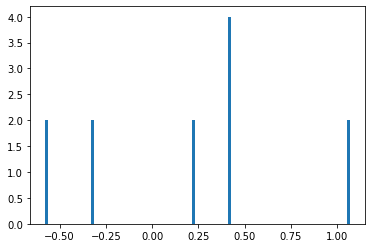

count    12.000000
mean      0.206439
std       0.560723
min      -0.577348
25%      -0.321556
50%       0.324012
75%       0.420464
max       1.069049
Name: ret_-1, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-7.95363850e-02, -6.95363850e-02, -5.95363850e-02, -4.95363850e-02,
        -3.95363850e-02, -2.95363850e-02, -1.95363850e-02, -9.53638505e-03,
         4.63614955e-04,  1.04636150e-02,  2.04636150e-02,  3.04636150e-02,
         4.04636150e-02,  5.04636150e-02,  6.04636150e-02,  7.04636150e-02,
         8.04636150e-02,  9.04636150e-02,  1.00463615e-01,  1.10463615e-01,
         1.20463615e-01,  1.30463615e-01,  1.40463615e-01,  1.50463615e-01,
         1.60463615e-01,  1.70463615e-01,  1.80463615e-01,  1.90463615e-01,
         2.0046361

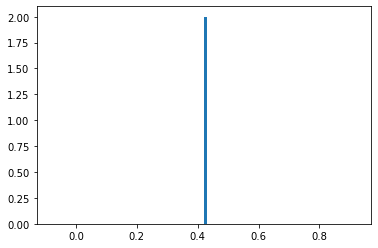

count    2.000000
mean     0.420464
std      0.000000
min      0.420464
25%      0.420464
50%      0.420464
75%      0.420464
max      0.420464
Name: ret_-1, dtype: float64

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([-0.5773484 , -0.56088442, -0.54442045, -0.52795647, -0.51149249,
        -0.49502852, -0.47856454, -0.46210056, -0.44563659, -0.42917261,
        -0.41270863, -0.39624466, -0.37978068, -0.3633167 , -0.34685273,
        -0.33038875, -0.31392477, -0.2974608 , -0.28099682, -0.26453284,
        -0.24806887, -0.23160489, -0.21514091, -0.19867694, -0.18221296,
        -0.16574898, -0.149285  , -0.13282103, -0.11635705, -0.09989307,
        -0.0834291 , -0.06696512, -0.05050114, -0.03403717, -0.01757319,
        -0.00110921,  0.01535476,  0.03

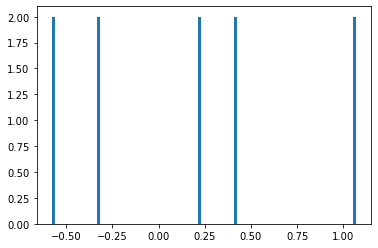

count    10.000000
mean      0.163634
std       0.609971
min      -0.577348
25%      -0.321556
50%       0.227561
75%       0.420464
max       1.069049
Name: ret_-1, dtype: float64

In [33]:
ret_class = 'ret_-1'

dfg = dfs.copy()
dfg.shape[0]
fig, ax = plt.subplots()
ax.hist(dfg[ret_class].values, bins=100)
plt.show()
dfg[ret_class].describe()

dfg = dfs.loc[(dfs['buy']>0)]
buy = dfg['buy'].values
ret = dfg[ret_class].values
fig, ax = plt.subplots()
ax.hist(ret,bins=100)
plt.show()
dfs.loc[(dfs['buy'] >0)][ret_class].describe()

dfg = dfs.loc[(dfs['buy']<0)]
buy = dfg['buy'].values
ret = dfg[ret_class].values
fig, ax = plt.subplots()
ax.hist(ret,bins=100)
plt.show()
dfs.loc[(dfs['buy'] <0)][ret_class].describe()

In [29]:
contractAddress = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'
dex = 'uniswapv2_ethereum'
csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 

csv['priceUSD'] = csv['priceUSD'].astype('float')
csv['date'] = pd.to_datetime(csv['date'])
csv.sort_values(['date'], ascending=True, inplace=True)
price = csv['priceUSD'].values
date = csv['date'].values

buys = dfs.loc[dfs['buy'] > 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
sells = dfs.loc[dfs['buy'] < 0, 'timestamp'].dt.strftime('%Y-%m-%d').values

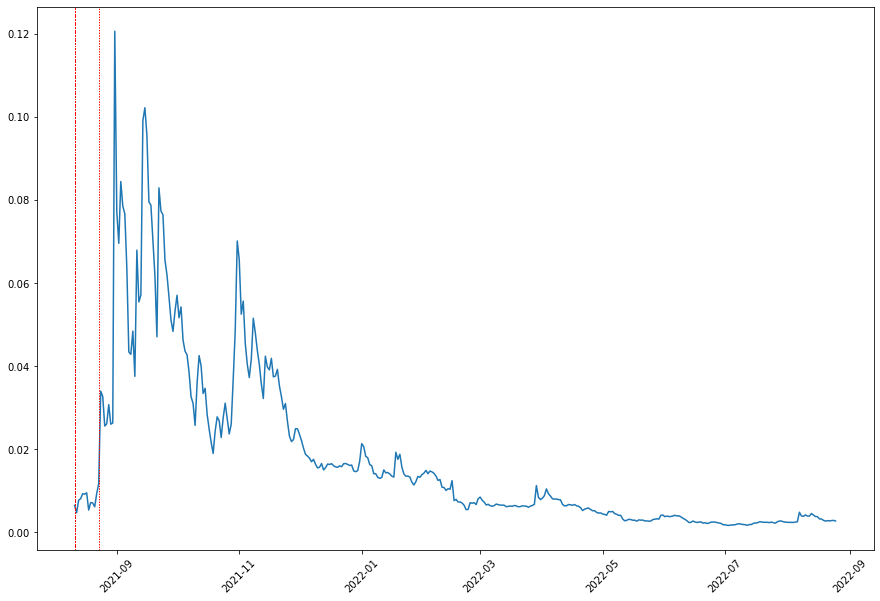

In [30]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for buy in buys:
    _ = plt.axvline(x=pd.to_datetime(buy), color='red', linestyle='dotted', linewidth=1)
     
plt.show()

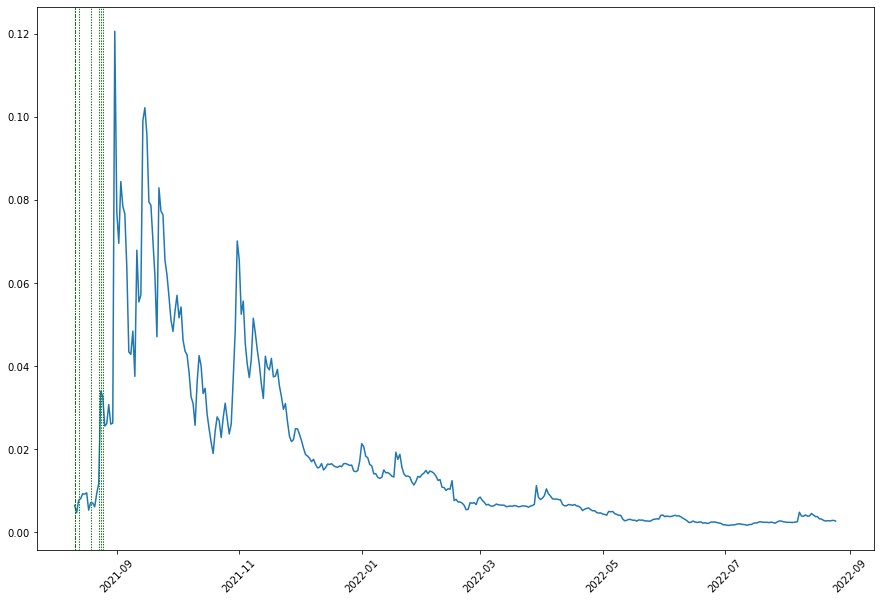

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for sell in sells:
    _ = plt.axvline(x=pd.to_datetime(sell), color='green', linestyle='dotted', linewidth=1)

# List

In [3]:
chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
dfs = []
for chain in chains:
    df = pd.read_csv(f'/home/yichen/team_defi/04_result/insider_trading/root_list/root_list_final/root_{chain}.csv')
    df.drop(columns='root', inplace=True)
    df.drop_duplicates('contractAddress', inplace=True)
    df['chain'] = chain
    df['status'] = -1
    # df.to_csv(f'{WD}whale/list/{chain}.csv', index=False)
    dfs.append(df)
    
dfs = pd.concat(dfs)
dfs

,tokenName,tokenSymbol,contractAddress,chain,status
0,Callisto,C3000,0x2a15de7c821baa1a727039b76d540b36b23db257,ethereum,-1
1,Callisto,C3000,0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb,ethereum,-1
2,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,ethereum,-1
3,t.me/skin_port,SKINPORT,0x506d62bf7d8a8f444f13533081dc03470483f4ea,ethereum,-1
4,KING VITALIK,KING ????,0xcbfb937a75f8baf9d94e064cc90b1c045f7c25fa,ethereum,-1
...,...,...,...,...,...
24,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,polygon,-1
25,NextEarthToken,NXTT,0x0d0B8488222F7f83B23E365320a4021b12eAD608,polygon,-1
26,Dogioh,DGH,0x87842eD511C255a06aE872E7Ad83a64a1e3bD39c,polygon,-1
27,POKI,POKI,0x3E41CE4f7ef7ca7C23640d2C8a906552a2A90092,polygon,-1


In [9]:
dup = dfs[dfs['contractAddress'].duplicated()]['contractAddress'].values
for i in dup:
    dfs.loc[dfs['contractAddress'] == i]

,tokenName,tokenSymbol,contractAddress,chain,status
741,fren,FREN,0x37941b3fdb2bd332e667d452a58be01bcacb923e,ethereum,-1
720,fren,fren,0x37941b3fdb2bd332e667d452a58be01bcacb923e,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
1244,CryptoCart V2,CCv2,0x612E1726435fE38dD49A0B35b4065B56f49c8F11,ethereum,-1
2810,CryptoCart V2,CCv2,0x612E1726435fE38dD49A0B35b4065B56f49c8F11,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
2090,Shorts Will Burn,xAMC,0xFff7a537B023Ab442B2F20da088a29Fd3B01edB4,ethereum,-1
3284,Shorts Will Burn,xAMC,0xFff7a537B023Ab442B2F20da088a29Fd3B01edB4,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
1173,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,ethereum,-1
3367,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,binance,-1
24,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,polygon,-1


,tokenName,tokenSymbol,contractAddress,chain,status
2934,CATCOIN,CATCOIN,0x3E362283B86C1b45097CC3FB02213b79CF6211Df,ethereum,-1
3374,CATCOIN,CATCOIN,0x3E362283B86C1b45097CC3FB02213b79CF6211Df,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
2009,SHiBGOTCHi,SHiBGOTCHi,0x05732b6D78591E75B31022d71E55Aa810498A5a4,ethereum,-1
3458,SHiBGOTCHi,SHiBGOTCHi,0x05732b6D78591E75B31022d71E55Aa810498A5a4,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
3812,ZOIDS,ZOIDS,0x18411D039214fCf7337333394fb55033E37210C4,ethereum,-1
4311,ZOIDS,ZOIDS,0x18411D039214fCf7337333394fb55033E37210C4,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
1240,fren,FREN,0x37941b3Fdb2bD332e667D452a58Be01bcacb923e,ethereum,-1
5493,fren,fren,0x37941b3Fdb2bD332e667D452a58Be01bcacb923e,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
7589,Black Doge Coin,BlogeCoin,0x258aee9C6D8E53ed76e6Ff18eAd707eAe9Eea227,ethereum,-1
5504,The Mission,MSN,0x258aee9C6D8E53ed76e6Ff18eAd707eAe9Eea227,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
7154,Social Crypto,SOCRYPT,0x9790d9CEC88a2ce9A3a1FBDAE87994A911654290,ethereum,-1
5559,Social Crypto,SOCRYPT,0x9790d9CEC88a2ce9A3a1FBDAE87994A911654290,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
7563,Mama Saitama Inu,MAMASAITAMA,0xFcEC7556B204008e26F78Dfa0996f0Df4994a354,ethereum,-1
5625,Mama Saitama Inu,MAMASAITAMA,0xFcEC7556B204008e26F78Dfa0996f0Df4994a354,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
6999,DRACARYS,DRAC,0xBCB5eC5a7A05946c3e85FD3b835Fee271390866e,ethereum,-1
5663,DRACARYS,DRAC,0xBCB5eC5a7A05946c3e85FD3b835Fee271390866e,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
1931,Erux,⚡ERX,0x8Ae73c17ACDCb2E71230197469e625F018074A03,ethereum,-1
5768,Erux,⚡ERX,0x8Ae73c17ACDCb2E71230197469e625F018074A03,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
1537,ThreeOh DAO,3OH,0x2e922f84EC5BB9CedfBb1A99543b143AA43D94b6,ethereum,-1
5817,ThreeOh DAO,3OH,0x2e922f84EC5BB9CedfBb1A99543b143AA43D94b6,binance,-1


,tokenName,tokenSymbol,contractAddress,chain,status
2166,Zombie Inu,ZINU,0x21f9b5b2626603e3f40bfc13d01afb8c431d382f,binance,-1
15,Zombie Inu,ZINU,0x21f9b5b2626603e3f40bfc13d01afb8c431d382f,polygon,-1


,tokenName,tokenSymbol,contractAddress,chain,status
1750,Dogioh Token,Dogioh,0x790540Ff6117205ac6eF132A5782bA4f4A611355,ethereum,-1
19,Dogioh Token,Dogioh,0x790540Ff6117205ac6eF132A5782bA4f4A611355,polygon,-1


,tokenName,tokenSymbol,contractAddress,chain,status
1173,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,ethereum,-1
3367,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,binance,-1
24,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,polygon,-1


## Correction

In [11]:
chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
dfs = []
for chain in chains:
    df = pd.read_csv(f'{WD}whale/list/{chain}.csv')
    df['chain'] = chain
    dfs.append(df)
    
dfs = pd.concat(dfs)
dfs

,tokenName,tokenSymbol,contractAddress,status,chain
0,Callisto,C3000,0x2a15de7c821baa1a727039b76d540b36b23db257,2,ethereum
1,Callisto,C3000,0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb,2,ethereum
2,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,100,ethereum
3,t.me/skin_port,SKINPORT,0x506d62bf7d8a8f444f13533081dc03470483f4ea,6,ethereum
4,KING VITALIK,KING ????,0xcbfb937a75f8baf9d94e064cc90b1c045f7c25fa,35,ethereum
...,...,...,...,...,...
22,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,100,polygon
23,NextEarthToken,NXTT,0x0d0B8488222F7f83B23E365320a4021b12eAD608,100,polygon
24,Dogioh,DGH,0x87842eD511C255a06aE872E7Ad83a64a1e3bD39c,51,polygon
25,POKI,POKI,0x3E41CE4f7ef7ca7C23640d2C8a906552a2A90092,69,polygon


In [20]:
dfs['dup'] = False

for i in dup:
    dfs.loc[dfs['contractAddress'] == i, 'dup'] = True
    
dfs
# dfs.to_csv(f'{WD}whale/list/panel.csv', index=False)

,tokenName,tokenSymbol,contractAddress,status,chain,dup
0,Callisto,C3000,0x2a15de7c821baa1a727039b76d540b36b23db257,2,ethereum,False
1,Callisto,C3000,0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb,2,ethereum,False
2,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,100,ethereum,False
3,t.me/skin_port,SKINPORT,0x506d62bf7d8a8f444f13533081dc03470483f4ea,6,ethereum,False
4,KING VITALIK,KING ????,0xcbfb937a75f8baf9d94e064cc90b1c045f7c25fa,35,ethereum,False
...,...,...,...,...,...,...
22,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,100,polygon,True
23,NextEarthToken,NXTT,0x0d0B8488222F7f83B23E365320a4021b12eAD608,100,polygon,False
24,Dogioh,DGH,0x87842eD511C255a06aE872E7Ad83a64a1e3bD39c,51,polygon,False
25,POKI,POKI,0x3E41CE4f7ef7ca7C23640d2C8a906552a2A90092,69,polygon,False


In [30]:
for idx, row in dfs.loc[(dfs['dup'] == False)&(dfs['status']>0)].iterrows():
    contractAddress = row['contractAddress']
    chain = row['chain']
    csv = pd.read_csv(f'{WD}whale/csv/{contractAddress}.csv')
    csv.to_csv(f'{WD}whale/csv/{contractAddress}_{chain}.csv', index=False)

In [26]:
dfs = pd.read_csv(f'{WD}whale/list/panel.csv')
for idx, row in dfs.loc[dfs['dup'] == True].iterrows():
    contractAddress = row['contractAddress']
    chain = row['chain']
    try:
        df = holders(tokencontract=contractAddress,
                     chain=chain)

        if len(df) != 0: df.to_csv(f'{WD}whale/csv/{contractAddress}_{chain}.csv', index=False)

        dfs.loc[(dfs['contractAddress'] == contractAddress)&(dfs['chain'] == chain), 'status'] = len(df)
        dfs.to_csv(f'{WD}whale/list/panel.csv', index=False)
        print(f'{contractAddress} {chain} get {len(df)} holders.')
                    
    except Exception as e:
        print(f'{contractAddress} {chain} Error: {e}')

0x37941b3fdb2bd332e667d452a58be01bcacb923e ethereum get 100 holders.
0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c ethereum get 100 holders.
0x37941b3Fdb2bD332e667D452a58Be01bcacb923e ethereum get 100 holders.
0x612E1726435fE38dD49A0B35b4065B56f49c8F11 ethereum get 100 holders.
0x2e922f84EC5BB9CedfBb1A99543b143AA43D94b6 ethereum get 100 holders.
0x790540Ff6117205ac6eF132A5782bA4f4A611355 ethereum get 16 holders.
0x8Ae73c17ACDCb2E71230197469e625F018074A03 ethereum get 100 holders.
0x05732b6D78591E75B31022d71E55Aa810498A5a4 ethereum get 100 holders.
0xFff7a537B023Ab442B2F20da088a29Fd3B01edB4 ethereum get 21 holders.
0x3E362283B86C1b45097CC3FB02213b79CF6211Df ethereum get 95 holders.
0x18411D039214fCf7337333394fb55033E37210C4 ethereum get 30 holders.
0xBCB5eC5a7A05946c3e85FD3b835Fee271390866e ethereum get 100 holders.
0x9790d9CEC88a2ce9A3a1FBDAE87994A911654290 ethereum get 100 holders.
0xFcEC7556B204008e26F78Dfa0996f0Df4994a354 ethereum get 100 holders.
0x258aee9C6D8E53ed76e6Ff18eAd707eAe9Ee

# Spider

In [3]:
class web_thread(threading.Thread):
    
    def __init__ (self, chain):
        threading.Thread.__init__(self)
        self.chain = chain
        
    def run(self):
        RD = '/home/team_defi/02_rdata/'
        WD = '/home/team_defi/03_wdata/'
        RES = '/home/team_defi/04_result/'
        
        lst = pd.read_csv(f'{WD}whale/list/{self.chain}.csv')
        total = lst.shape[0]
        done = lst.loc[lst['status'] > -1].shape[0]
        
        for idx, row in lst.loc[lst['status'] == -1].iterrows():
            try:
                done += 1
                contractAddress = row['contractAddress']
                df = holders(tokencontract=contractAddress,
                     chain=self.chain)

                if len(df) != 0: df.to_csv(f'{WD}whale/csv/{contractAddress}.csv', index=False)
                
                lst.loc[lst['contractAddress'] == contractAddress, 'status'] = len(df)
                lst.to_csv(f'{WD}whale/list/{self.chain}.csv', index=False)
                print(f'{contractAddress} {self.chain} get {len(df)} holders. {done}/{total}')
                    
            except Exception as e:
                print(f'{contractAddress} {self.chain} Error: {e} {done}/{total}')
                
        print(f'{self.chain} done.')

In [ ]:
thread1 = web_thread('ethereum')
thread2 = web_thread('binance')
thread3 = web_thread('fantom')
thread4 = web_thread('polygon')
thread5 = web_thread('avalanche')

Threads = [
           thread1, 
           thread2, 
           thread3,
           thread4,
           thread5,
]

for t in Threads:
    t.start()
for t in Threads:
    t.join()

polygon done.
0x1e6adb334150700df13e38c49b98c30040e72e0f binance Error: 'NoneType' object has no attribute 'find_all' 4899/4920
0xba7D19e1C4F00A1bFbe2D1BA36c9C5C2C647383d avalanche Error: 'NoneType' object has no attribute 'find_all' 805/807
0xEb81cba4F5Be688d22866481829B9EFDF8774cA8 fantom Error: 'NoneType' object has no attribute 'find_all' 12/12
fantom done.
0x525a8f6f3ba4752868cde25164382bfbae3990e1 ethereum Error: 'NoneType' object has no attribute 'find_all' 7469/7743
0xe1d0916466209aB1F497D5354056c3dFaC59d351 ethereum Error: 'NoneType' object has no attribute 'find_all' 7470/7743
0x588cEB2C4944Dc5b6fCcc25526B8bEF8d97FAB2B avalanche Error: 'NoneType' object has no attribute 'find_all' 806/807
0x1bbd2EF9B9E7F4DfB00f0f7D2EE828319154505d ethereum Error: 'NoneType' object has no attribute 'find_all' 7471/7743
0xD15950c56b52bbfb8Eb62C1535a8A25B0579F0D8 avalanche Error: 'NoneType' object has no attribute 'find_all' 807/807
avalanche done.
0x8bDf93A8adC01eBA2F760BdB3f392d92167A07F0 ethe

# Whale Definition

- Non Contract
- 10% holding
- Non Root

## Example

In [101]:
lst = pd.read_csv(f'{WD}whale/list/panel.csv')
lst.iloc[2]

tokenName                                                SYNC
tokenSymbol                                              SYNC
contractAddress    0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32
status                                                    100
chain                                                ethereum
dup                                                     False
Name: 2, dtype: object

In [102]:
contractAddress = '0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32'
chain = 'ethereum'
df = pd.read_csv(f'{WD}whale/csv/{contractAddress}_{chain}.csv')
# df['Percentage'] = df['Percentage'].apply(lambda x: float(x.strip('%'))/100)
# df.loc[df['Percentage'] > 0.1]
df

df = df.loc[[True if (re.match('0x', i) != None) else False for i in df['Address']]]
df

,Rank,Address,Quantity,Percentage
0,1,0x755f60275578d747763f098f22722fc6b66c6730,"24,428,251.447237437586850749",15.7005%
1,2,Uniswap V2: SYNC 4,"23,526,606.385827288948072521",15.1210%
2,3,0x5ed7d8e2089b2b0e15439735b937cec5f0ae811b,"9,028,385.664053631184250482",5.8027%
3,4,0x7f87aaccbafd3c1ac66a84aba719de3dee7230b7,"7,909,417.30403295928887199",5.0835%
4,5,0x36c39434db7987cae67233d06de9427c4c67e787,"6,075,739.162088075229878178",3.9050%
5,6,0x1e6da5ed1586271ef004cefac694eedfe77bc7a9,"5,422,214.972696736127979988",3.4850%
6,7,0x06dad865936fa66abec9327667ae234f2dc6690c,"3,275,215.861619518032113566",2.1050%
7,8,0xc84775858ad5f63098f48b18b9aa42111077a387,"3,086,425.375600233573151174",1.9837%
8,9,0x73b8c96a1131c19b6a0dc972099ee5e2b328f66b,"2,802,037.980734922070658568",1.8009%
9,10,0x802978f8f7bea8c6c072496c53d0e91e861194e5,"2,566,933.374323708776306076",1.6498%


,Rank,Address,Quantity,Percentage
0,1,0x755f60275578d747763f098f22722fc6b66c6730,"24,428,251.447237437586850749",15.7005%
2,3,0x5ed7d8e2089b2b0e15439735b937cec5f0ae811b,"9,028,385.664053631184250482",5.8027%
3,4,0x7f87aaccbafd3c1ac66a84aba719de3dee7230b7,"7,909,417.30403295928887199",5.0835%
4,5,0x36c39434db7987cae67233d06de9427c4c67e787,"6,075,739.162088075229878178",3.9050%
5,6,0x1e6da5ed1586271ef004cefac694eedfe77bc7a9,"5,422,214.972696736127979988",3.4850%
6,7,0x06dad865936fa66abec9327667ae234f2dc6690c,"3,275,215.861619518032113566",2.1050%
7,8,0xc84775858ad5f63098f48b18b9aa42111077a387,"3,086,425.375600233573151174",1.9837%
8,9,0x73b8c96a1131c19b6a0dc972099ee5e2b328f66b,"2,802,037.980734922070658568",1.8009%
9,10,0x802978f8f7bea8c6c072496c53d0e91e861194e5,"2,566,933.374323708776306076",1.6498%
10,11,0xb419c953eb75ec971dc4e9e925f0815a1a991f84,"2,467,344.471619538032114568",1.5858%


In [84]:
re.match('0x', '0x42e0697a8d309e0be55390d612ee39112764b47a') != None

contract(address = 'TrustSwap: Team Finance Lock',
         chian = 'ethereum')

True

'string'

## More than 10%

In [103]:
lst = pd.read_csv(f'{WD}whale/list/panel.csv')
dfs = []

for idx, row in lst.loc[lst['status'] >0].iterrows():
    contractAddress = row['contractAddress']
    chain = row['chain']
    tokenName = row['tokenName']
    tokenSymbol = row['tokenSymbol']

    df = pd.read_csv(f'{WD}whale/csv/{contractAddress}_{chain}.csv')
    df = df.loc[[True if (re.match('0x', i) != None) else False for i in df['Address']]]
    
    df['percentage'] = df['Percentage'].apply(lambda x: float(x.strip('%').replace(',', ''))/100)
    df['tokenName'] = tokenName
    df['tokenSymbol'] = tokenSymbol
    df['contractAddress'] = contractAddress
    df['chain'] = chain
    df = df.loc[df['percentage'] > 0.1]
    dfs.append(df)

    
dfs = pd.concat(dfs)
dfs

,Rank,Address,Quantity,Percentage,percentage,tokenName,tokenSymbol,contractAddress,chain
0,1,0x3b5bc2643640c87235ff00160c15d31539f02a94,"960,409,000,000,000",96.0409%,0.960409,Callisto,C3000,0x2a15de7c821baa1a727039b76d540b36b23db257,ethereum
0,1,0x990d3a9832928ebc7c6cbe7261dc626000c23775,"960,409,000,000,000",96.0409%,0.960409,Callisto,C3000,0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb,ethereum
0,1,0x755f60275578d747763f098f22722fc6b66c6730,"24,428,251.447237437586850749",15.7005%,0.157005,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,ethereum
0,1,0x6e86c831b85cc37f0aeeb5d553c40b257af8fb42,"999,999,997,553,370,000,000,000",100.0000%,1.0,t.me/skin_port,SKINPORT,0x506d62bf7d8a8f444f13533081dc03470483f4ea,ethereum
2,3,0x45f31ccbd796020988f30f33577b8a18a8a20d0f,"12,432,927,882.410482784693403456",12.4329%,0.124329,Healthcare Heroes Project,HERO,0xb30fdcc074ef57e43caa44c1a8008e2f9cde647b,ethereum
...,...,...,...,...,...,...,...,...,...
0,1,0xcad8536ff4d5c3ff502292bd24bfe5dbe23a223d,"882,374,665.66651",88.2375%,0.882375,OkLetsPlay,OKLP,0x5D48a5E5a3e737322Ae27e25897F1c9E19EcC941,polygon
0,1,0xad33bc0b5d50fe1ecd3c3a0fa423314a1e1dc01b,"836,603,747,298,198,000.669072578",83.6604%,0.836604,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,polygon
0,1,0x12984c8975de6acc25783a6ce04a772475aec010,"7,319,241.128952387770510755",91.4623%,0.914623,Dogioh,DGH,0x87842eD511C255a06aE872E7Ad83a64a1e3bD39c,polygon
0,1,0x81411b800dcc935e1aaf0ed01dd1c0777236153c,"3,685,104.315095552",36.8510%,0.36851,POKI,POKI,0x3E41CE4f7ef7ca7C23640d2C8a906552a2A90092,polygon


In [106]:
dfs['status'] = -1
dfs.to_csv(f'{WD}whale/list_contract/list.csv', index=False)

## Non Contract

In [110]:
lst = pd.read_csv(f'{WD}whale/list_contract/list.csv')
total = lst.shape[0]
done = lst.loc[lst['status'] != -1].shape[0]

for idx, row in lst.drop_duplicates(['Address', 'chain']).iterrows():
    done += 1
    Address = row['Address']
    chain = row['chain']
    try:
        contract_status = contract(address=Address,chian=chain)
        lst.loc[(lst['Address'] == Address)&(lst['chain'] == chain), 'contract'] = contract_status
        lst.to_csv(f'{WD}whale/list_contract/list.csv', index=False)
        print(f'{Address}, {chain} {contract_status} {done}/{total}')
        
    except Exception as e:
        print(f'{Address}, {chain} Error: {e} {done}/{total}')

0x3b5bc2643640c87235ff00160c15d31539f02a94, ethereum True 1/12627
0x990d3a9832928ebc7c6cbe7261dc626000c23775, ethereum True 2/12627
0x755f60275578d747763f098f22722fc6b66c6730, ethereum True 3/12627
0x6e86c831b85cc37f0aeeb5d553c40b257af8fb42, ethereum False 4/12627
0x45f31ccbd796020988f30f33577b8a18a8a20d0f, ethereum False 5/12627
0x2cdf6898985aa06e6d13a91d0d25e7deadec4429, ethereum False 6/12627
0x0938d4da167831e1d9d7c22b045593f67d665553, ethereum False 7/12627
0xa4196e224a4a23a6293f55522ec11ef14037b552, ethereum False 8/12627
0x71c10bc5cb860e2691ba1cf1b6839ec69bac1f07, ethereum False 9/12627
0x44ce5c11d2e7f0904ac95d2548d7006fe35dbeeb, ethereum False 10/12627
0x6d98c23ba73c4f5d1beec3be124ed07d01ab6c84, ethereum True 11/12627
0xbecca544da77c293e1017a621da5f44374500317, ethereum False 12/12627
0x4eee52e5a2b15e78a9fe5e262b09102cd5ae1927, ethereum False 13/12627
0xa40ad03944356db60959099c109b93464dd095e0, ethereum False 14/12627
0xb8b7ac6f1400f6b3c9003efcc0f76e1d05c97169, ethereum False 15

KeyboardInterrupt: 

In [100]:
lst = pd.read_csv(f'{WD}whale/list_contract/list.csv')
lst
lst['contract'].isna().sum()

,Rank,Address,Quantity,Percentage,percentage,tokenName,tokenSymbol,contractAddress,chain,status,contract
0,1,0x3b5bc2643640c87235ff00160c15d31539f02a94,"960,409,000,000,000",96.0409%,0.960409,Callisto,C3000,0x2a15de7c821baa1a727039b76d540b36b23db257,ethereum,-1,True
1,1,0x990d3a9832928ebc7c6cbe7261dc626000c23775,"960,409,000,000,000",96.0409%,0.960409,Callisto,C3000,0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb,ethereum,-1,True
2,1,0x755f60275578d747763f098f22722fc6b66c6730,"24,428,251.447237437586850749",15.7005%,0.157005,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,ethereum,-1,True
3,1,0x6e86c831b85cc37f0aeeb5d553c40b257af8fb42,"999,999,997,553,370,000,000,000",100.0000%,1.000000,t.me/skin_port,SKINPORT,0x506d62bf7d8a8f444f13533081dc03470483f4ea,ethereum,-1,False
4,3,0x45f31ccbd796020988f30f33577b8a18a8a20d0f,"12,432,927,882.410482784693403456",12.4329%,0.124329,Healthcare Heroes Project,HERO,0xb30fdcc074ef57e43caa44c1a8008e2f9cde647b,ethereum,-1,False
...,...,...,...,...,...,...,...,...,...,...,...
12622,1,0xcad8536ff4d5c3ff502292bd24bfe5dbe23a223d,"882,374,665.66651",88.2375%,0.882375,OkLetsPlay,OKLP,0x5D48a5E5a3e737322Ae27e25897F1c9E19EcC941,polygon,-1,False
12623,1,0xad33bc0b5d50fe1ecd3c3a0fa423314a1e1dc01b,"836,603,747,298,198,000.669072578",83.6604%,0.836604,Chihiro Inu,CHIRO,0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c,polygon,-1,True
12624,1,0x12984c8975de6acc25783a6ce04a772475aec010,"7,319,241.128952387770510755",91.4623%,0.914623,Dogioh,DGH,0x87842eD511C255a06aE872E7Ad83a64a1e3bD39c,polygon,-1,True
12625,1,0x81411b800dcc935e1aaf0ed01dd1c0777236153c,"3,685,104.315095552",36.8510%,0.368510,POKI,POKI,0x3E41CE4f7ef7ca7C23640d2C8a906552a2A90092,polygon,-1,False


0

## Non Root

In [124]:
lst = pd.read_csv(f'{WD}whale/list_contract/list.csv')
lst.drop(columns='status', inplace=True)
lst = lst.loc[lst['contract'] == False]
lst['root'] = False
lst['address'] = lst['Address'].apply(lambda x: x.lower())
lst

,Rank,Address,Quantity,Percentage,percentage,tokenName,tokenSymbol,contractAddress,chain,contract,root,address
3,1,0x6e86c831b85cc37f0aeeb5d553c40b257af8fb42,"999,999,997,553,370,000,000,000",100.0000%,1.000000,t.me/skin_port,SKINPORT,0x506d62bf7d8a8f444f13533081dc03470483f4ea,ethereum,False,False,0x6e86c831b85cc37f0aeeb5d553c40b257af8fb42
4,3,0x45f31ccbd796020988f30f33577b8a18a8a20d0f,"12,432,927,882.410482784693403456",12.4329%,0.124329,Healthcare Heroes Project,HERO,0xb30fdcc074ef57e43caa44c1a8008e2f9cde647b,ethereum,False,False,0x45f31ccbd796020988f30f33577b8a18a8a20d0f
5,1,0x2cdf6898985aa06e6d13a91d0d25e7deadec4429,"484,585,773.800928437182738573",48.4586%,0.484586,Billion,BILL,0x0239d3a3485ec54511bee9d77d92695e443bf060,ethereum,False,False,0x2cdf6898985aa06e6d13a91d0d25e7deadec4429
6,2,0x0938d4da167831e1d9d7c22b045593f67d665553,15.447578,15.4476%,0.154476,RunwayDiamond,RNWY????,0x834806a97938ae7270d3dfef01240206b380e716,ethereum,False,False,0x0938d4da167831e1d9d7c22b045593f67d665553
7,1,0xa4196e224a4a23a6293f55522ec11ef14037b552,"5,423,734.102694784382567236",54.2373%,0.542373,NMR Risk Management Technology,NMRT,0x9a488708ce78e910fa07203bf2c78d7848485f77,ethereum,False,False,0xa4196e224a4a23a6293f55522ec11ef14037b552
...,...,...,...,...,...,...,...,...,...,...,...,...
12618,5,0x4ad441b0d7d5e13e774cc4dc67f1d0c0b99e9ed2,"55,000,000",11.0000%,0.110000,ZROToken,ZRO,0x6AcdA5E7EB1117733DC7Cb6158fc67f226b32022,polygon,False,False,0x4ad441b0d7d5e13e774cc4dc67f1d0c0b99e9ed2
12620,1,0xcea9afdc83ac2aac6a0748f9569a49ab06acf58b,"390,000,000",78.0000%,0.780000,Shiba Yacht Club,SYC,0xDbb52129D1561b3AEFcaDD14D0bC02a3aC34a10D,polygon,False,False,0xcea9afdc83ac2aac6a0748f9569a49ab06acf58b
12622,1,0xcad8536ff4d5c3ff502292bd24bfe5dbe23a223d,"882,374,665.66651",88.2375%,0.882375,OkLetsPlay,OKLP,0x5D48a5E5a3e737322Ae27e25897F1c9E19EcC941,polygon,False,False,0xcad8536ff4d5c3ff502292bd24bfe5dbe23a223d
12625,1,0x81411b800dcc935e1aaf0ed01dd1c0777236153c,"3,685,104.315095552",36.8510%,0.368510,POKI,POKI,0x3E41CE4f7ef7ca7C23640d2C8a906552a2A90092,polygon,False,False,0x81411b800dcc935e1aaf0ed01dd1c0777236153c


In [125]:
chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
dfs = []
for chain in chains:
    df = pd.read_csv(f'/home/yichen/team_defi/04_result/insider_trading/root_list/root_list_final/root_{chain}.csv')
    for idx, row in df.iterrows():
        root = row['root'].lower()
        contractAddress = row['contractAddress']
        
        lst.loc[(lst['contractAddress'] == contractAddress)&(lst['chain'] == chain)&(lst['address'] == root), 'root'] = True

In [127]:
lst['root'].value_counts()
lst.loc[lst['root'] == True].sample(1)

True     8248
False    2177
Name: root, dtype: int64

,Rank,Address,Quantity,Percentage,percentage,tokenName,tokenSymbol,contractAddress,chain,contract,root,address
1974,1,0x00e62ecc4b1f0efbd1a6f53a9dc1f8271397200e,"9,311,705,278.562395112",93.1171%,0.931171,LibraJudgement,Libra,0xb2EecdD8ea442319d50ad0Bd4e29A89E017333D6,ethereum,False,True,0x00e62ecc4b1f0efbd1a6f53a9dc1f8271397200e


In [128]:
df = pd.read_csv(f'/home/yichen/team_defi/04_result/insider_trading/root_list/root_list_final/root_ethereum.csv')
df.loc[df['root'] == '0x00e62ecc4b1f0efbd1a6f53a9dc1f8271397200e']

,root,tokenName,tokenSymbol,contractAddress
3174,0x00e62ecc4b1f0efbd1a6f53a9dc1f8271397200e,LibraJudgement,Libra,0xb2EecdD8ea442319d50ad0Bd4e29A89E017333D6


In [129]:
panel = lst.loc[lst['root'] == False]
panel

,Rank,Address,Quantity,Percentage,percentage,tokenName,tokenSymbol,contractAddress,chain,contract,root,address
4,3,0x45f31ccbd796020988f30f33577b8a18a8a20d0f,"12,432,927,882.410482784693403456",12.4329%,0.124329,Healthcare Heroes Project,HERO,0xb30fdcc074ef57e43caa44c1a8008e2f9cde647b,ethereum,False,False,0x45f31ccbd796020988f30f33577b8a18a8a20d0f
5,1,0x2cdf6898985aa06e6d13a91d0d25e7deadec4429,"484,585,773.800928437182738573",48.4586%,0.484586,Billion,BILL,0x0239d3a3485ec54511bee9d77d92695e443bf060,ethereum,False,False,0x2cdf6898985aa06e6d13a91d0d25e7deadec4429
6,2,0x0938d4da167831e1d9d7c22b045593f67d665553,15.447578,15.4476%,0.154476,RunwayDiamond,RNWY????,0x834806a97938ae7270d3dfef01240206b380e716,ethereum,False,False,0x0938d4da167831e1d9d7c22b045593f67d665553
8,2,0x71c10bc5cb860e2691ba1cf1b6839ec69bac1f07,"20,000",20.0000%,0.200000,BLINK,BLINK,0xc8afe5ca73af2161b9dbfccef3ae550f6765d00b,ethereum,False,False,0x71c10bc5cb860e2691ba1cf1b6839ec69bac1f07
9,3,0x44ce5c11d2e7f0904ac95d2548d7006fe35dbeeb,"17,620.939124999999936736",17.6209%,0.176209,BLINK,BLINK,0xc8afe5ca73af2161b9dbfccef3ae550f6765d00b,ethereum,False,False,0x44ce5c11d2e7f0904ac95d2548d7006fe35dbeeb
...,...,...,...,...,...,...,...,...,...,...,...,...
12596,3,0xaa19d18d82352432e54d5ef8c2fb22c7f60ef898,"108,575,146",10.8575%,0.108575,Hasbik,HAS,0x01c4c105076bdb01ba329543ff99c85f4097a9c9,polygon,False,False,0xaa19d18d82352432e54d5ef8c2fb22c7f60ef898
12597,1,0xbeb667695a799d6cd5d50ea2e261e14535dd73b9,"754,861.519449914160477774",48.2368%,0.482368,Echelon DAO,ECHO,0x55e29f7280565d6c392c192161de9e57b125165b,polygon,False,False,0xbeb667695a799d6cd5d50ea2e261e14535dd73b9
12608,1,0x885f5fd87e62ed2ebd0b0bb1c295c4c43edee5b5,"564,894,098,130,855.881522944",56.4894%,0.564894,Zombie Inu,ZINU,0x21f9b5b2626603e3f40bfc13d01afb8c431d382f,polygon,False,False,0x885f5fd87e62ed2ebd0b0bb1c295c4c43edee5b5
12618,5,0x4ad441b0d7d5e13e774cc4dc67f1d0c0b99e9ed2,"55,000,000",11.0000%,0.110000,ZROToken,ZRO,0x6AcdA5E7EB1117733DC7Cb6158fc67f226b32022,polygon,False,False,0x4ad441b0d7d5e13e774cc4dc67f1d0c0b99e9ed2


In [131]:
panel['status'] = -1
panel
panel.to_csv(f'{WD}whale_swap/list/list.csv', index=False)

/tmp/ipykernel_564408/3843311024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel['status'] = -1


,Rank,Address,Quantity,Percentage,percentage,tokenName,tokenSymbol,contractAddress,chain,contract,root,address,status
4,3,0x45f31ccbd796020988f30f33577b8a18a8a20d0f,"12,432,927,882.410482784693403456",12.4329%,0.124329,Healthcare Heroes Project,HERO,0xb30fdcc074ef57e43caa44c1a8008e2f9cde647b,ethereum,False,False,0x45f31ccbd796020988f30f33577b8a18a8a20d0f,-1
5,1,0x2cdf6898985aa06e6d13a91d0d25e7deadec4429,"484,585,773.800928437182738573",48.4586%,0.484586,Billion,BILL,0x0239d3a3485ec54511bee9d77d92695e443bf060,ethereum,False,False,0x2cdf6898985aa06e6d13a91d0d25e7deadec4429,-1
6,2,0x0938d4da167831e1d9d7c22b045593f67d665553,15.447578,15.4476%,0.154476,RunwayDiamond,RNWY????,0x834806a97938ae7270d3dfef01240206b380e716,ethereum,False,False,0x0938d4da167831e1d9d7c22b045593f67d665553,-1
8,2,0x71c10bc5cb860e2691ba1cf1b6839ec69bac1f07,"20,000",20.0000%,0.200000,BLINK,BLINK,0xc8afe5ca73af2161b9dbfccef3ae550f6765d00b,ethereum,False,False,0x71c10bc5cb860e2691ba1cf1b6839ec69bac1f07,-1
9,3,0x44ce5c11d2e7f0904ac95d2548d7006fe35dbeeb,"17,620.939124999999936736",17.6209%,0.176209,BLINK,BLINK,0xc8afe5ca73af2161b9dbfccef3ae550f6765d00b,ethereum,False,False,0x44ce5c11d2e7f0904ac95d2548d7006fe35dbeeb,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12596,3,0xaa19d18d82352432e54d5ef8c2fb22c7f60ef898,"108,575,146",10.8575%,0.108575,Hasbik,HAS,0x01c4c105076bdb01ba329543ff99c85f4097a9c9,polygon,False,False,0xaa19d18d82352432e54d5ef8c2fb22c7f60ef898,-1
12597,1,0xbeb667695a799d6cd5d50ea2e261e14535dd73b9,"754,861.519449914160477774",48.2368%,0.482368,Echelon DAO,ECHO,0x55e29f7280565d6c392c192161de9e57b125165b,polygon,False,False,0xbeb667695a799d6cd5d50ea2e261e14535dd73b9,-1
12608,1,0x885f5fd87e62ed2ebd0b0bb1c295c4c43edee5b5,"564,894,098,130,855.881522944",56.4894%,0.564894,Zombie Inu,ZINU,0x21f9b5b2626603e3f40bfc13d01afb8c431d382f,polygon,False,False,0x885f5fd87e62ed2ebd0b0bb1c295c4c43edee5b5,-1
12618,5,0x4ad441b0d7d5e13e774cc4dc67f1d0c0b99e9ed2,"55,000,000",11.0000%,0.110000,ZROToken,ZRO,0x6AcdA5E7EB1117733DC7Cb6158fc67f226b32022,polygon,False,False,0x4ad441b0d7d5e13e774cc4dc67f1d0c0b99e9ed2,-1


# Swap Spider

## List

In [146]:
# panel = pd.read_csv(f'{WD}whale_swap/list/list.csv')

# for chain in ['ethereum', 'binance', 'polygon', 'fantom', 'avalanche']:
#     for dex in chain_info(chain):
#         lst = panel.loc[panel['chain'] == chain].copy()
#         lst.to_csv(f'{WD}whale_swap/list/{dex}.csv', index=False)

In [ ]:
panel = pd.read_csv(f'{WD}whale_swap/list/list.csv')

for chain in ['ethereum', 'binance', 'polygon', 'fantom', 'avalanche']:
    lst = panel.loc[panel['chain'] == chain].copy()
    chain
    lst['Address'].nunique()
    lst['contractAddress'].nunique()

## Spider

In [14]:
class web_thread(threading.Thread):
    
    def __init__ (self, dex):
        threading.Thread.__init__(self)
        self.dex = dex
        
    def run(self):
        RD = '/home/team_defi/02_rdata/'
        WD = '/home/team_defi/03_wdata/'
        RES = '/home/team_defi/04_result/'
        
        lst = pd.read_csv(f'{WD}whale_swap/list/{self.dex}.csv')
        
        done = lst.loc[lst['status'] != -1].shape[0]
        total = lst.shape[0]
        
        for idx, row in lst.loc[lst['status'] == -1].iterrows():
            Address = row['Address']
            chain = row['chain']
            
            try:
                done += 1
                
                dfs = insider_transaction(address=Address, dex=self.dex)
                
                if len(dfs) == 0:
                    lst.loc[lst['Address'] == Address, 'status'] = 0
                    print(f'{Address}, {self.dex} no swap, {done}/{total}')
                else:
                    dfs.to_csv(f'{WD}whale_swap/csv/{Address}_{self.dex}.csv', index=False)
                    length = dfs.shape[0]
                    lst.loc[lst['Address'] == Address, 'status'] = length
                    print(f'{Address}, {self.dex} find {length} swap, {done}/{total}')
                
                lst.to_csv(f'{WD}whale_swap/list/{self.dex}.csv', index=False)
                
            except Exception as e:
                time.sleep(2)
                print(f'{Address}, {self.dex}, Error: {e}')
                
        print(f'{self.dex} done')

In [15]:
thread1 = web_thread('uniswapv3_ethereum')
thread2 = web_thread('uniswapv2_ethereum')
thread3 = web_thread('sushiswap_ethereum')

thread4 = web_thread('pancake_binance')
thread5 = web_thread('biswap_binance')
thread6 = web_thread('apeswap_binance')
thread7 = web_thread('babyswap_binance')
thread8 = web_thread('jetswap_binance')

thread9 = web_thread('traderjoe_avalanche')
thread10 = web_thread('pangolin_avalanche')

thread11 = web_thread('sushiswap_polygon')
thread12 = web_thread('apeswap_polygon')
thread13 = web_thread('jetswap_polygon')

In [ ]:
Threads = [
           thread1, 
           thread2, 
           thread3,
           thread4,
           thread5,
           thread6,
           thread7,
           thread8,
           thread9,
           thread10,
           thread11,
           thread12,
           thread13,
          ]
for t in Threads:
    t.start()
for t in Threads:
    t.join()

jetswap_polygon done
sushiswap_ethereum done
sushiswap_polygon done
pangolin_avalanche done
apeswap_polygon done
biswap_binance donetraderjoe_avalanche done

apeswap_binance done
babyswap_binance done
jetswap_binance done
0xbcb05a3f85d34f0194c70d5914d5c4e28f11cc02, uniswapv2_ethereum find 1488 swap, 622/622
uniswapv2_ethereum done
0x60b86af869f23aeb552fb7f3cabd11b829f6ab2f, uniswapv3_ethereum find 1000 swap, 622/622
uniswapv3_ethereum done
0xae857493e6296beec24a386ee8ccc914010a16d2, pancake_binance, Error: 'data'


# Home Token

## Isolation

In [19]:
for chain in ['ethereum', 'binance', 'avalanche', 'polygon', 'fantom']:
    dfs = []
    
    for dex in chain_info(chain):

        
        lst = pd.read_csv(f'{WD}whale_swap/list/{dex}.csv')
        total = lst.loc[lst['status'] > 0].shape[0]
        num = 0
        
        for idx, row in lst.loc[lst['status'] > 0].iterrows():
            num += 1
            print(f'{dex}, {num}/{total}')
            Address = row['Address']
            contractAddress = row['contractAddress']
            
            df = pd.read_csv(f'{WD}whale_swap/csv/{Address}_{dex}.csv')
            df = home_token_filter(df, contractAddress)
            df = df.loc[df['home_token'] == True]
            
            if df.shape[0] != 0:
                df['dex'] = dex
                df['chain'] = chain
                df['insider_Address'] = Address
                df['insider_contractAddress'] = contractAddress
                dfs.append(df)
                
                
    if len(dfs) != 0:
        dfs = pd.concat(dfs)
        dfs.to_csv(f'{WD}whale_swap/panel/{chain}.csv', index=False)

uniswapv3_ethereum, 1/306
uniswapv3_ethereum, 2/306
uniswapv3_ethereum, 3/306
uniswapv3_ethereum, 4/306
uniswapv3_ethereum, 5/306
uniswapv3_ethereum, 6/306
uniswapv3_ethereum, 7/306
uniswapv3_ethereum, 8/306
uniswapv3_ethereum, 9/306
uniswapv3_ethereum, 10/306
uniswapv3_ethereum, 11/306
uniswapv3_ethereum, 12/306
uniswapv3_ethereum, 13/306
uniswapv3_ethereum, 14/306
uniswapv3_ethereum, 15/306
uniswapv3_ethereum, 16/306
uniswapv3_ethereum, 17/306
uniswapv3_ethereum, 18/306
uniswapv3_ethereum, 19/306
uniswapv3_ethereum, 20/306
uniswapv3_ethereum, 21/306
uniswapv3_ethereum, 22/306
uniswapv3_ethereum, 23/306
uniswapv3_ethereum, 24/306
uniswapv3_ethereum, 25/306
uniswapv3_ethereum, 26/306
uniswapv3_ethereum, 27/306
uniswapv3_ethereum, 28/306
uniswapv3_ethereum, 29/306
uniswapv3_ethereum, 30/306
uniswapv3_ethereum, 31/306
uniswapv3_ethereum, 32/306
uniswapv3_ethereum, 33/306
uniswapv3_ethereum, 34/306
uniswapv3_ethereum, 35/306
uniswapv3_ethereum, 36/306
uniswapv3_ethereum, 37/306
uniswapv3_

## Check

In [23]:
dfs = []
for chain in ['ethereum', 'binance', 'avalanche']:   
    df = pd.read_csv(f'{WD}whale_swap/panel/{chain}.csv')
    df
    dfs.append(df)
    
dfs = pd.concat(dfs)
dfs.to_csv(f'{WD}whale_swap/panel/panel.csv', index=False)

,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to
0,813.364176,0xe1d4a548fee7cd5db89eb6485ea10278763c88b9299a7687ad4f0b1690a5b8a9#79,153,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xe592427a0aece92de3edee1f18e0157c05861564,203755638776131382057278,-257432.0,2021-12-04 22:04:42,The Show Goes On,Wrapped Ether,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe1d4a548fee7cd5db89eb6485ea10278763c88b9299a7687ad4f0b1690a5b8a9,3.084422e+10,0.000000,0.0,0.200000,True,uniswapv3_ethereum,ethereum,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,NaN,NaN
1,202.951974,0xef79eee76f3227fbfe8d38ca6d9df174a8c4eb3866866e3dfba9b4edb6665501#77,288,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xe592427a0aece92de3edee1f18e0157c05861564,198010363065038815891821,-258004.0,2021-12-04 21:53:27,The Show Goes On,Wrapped Ether,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xef79eee76f3227fbfe8d38ca6d9df174a8c4eb3866866e3dfba9b4edb6665501,8.027421e+09,0.000000,0.0,0.050000,True,uniswapv3_ethereum,ethereum,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,NaN,NaN
2,1500.000000,0x55ca1dbf81d61e7a27b635adbacbb5d6ab0c0656fe1b5d25970edffd0ce5021c#1041,178,0x7a297b24f660aa92f86fc9e13cc1d8fedd42aab2,0x7a297b24f660aa92f86fc9e13cc1d8fedd42aab2,0xe592427a0aece92de3edee1f18e0157c05861564,7883078870279850286731315234154,92007.0,2021-10-16 04:28:27,nomad Coin,USD Coin,0x56860dbf9437c7109e1b3f66c00c68d33ee12a50,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x55ca1dbf81d61e7a27b635adbacbb5d6ab0c0656fe1b5d25970edffd0ce5021c,0.000000e+00,1230.490000,1500.0,0.000000,True,uniswapv3_ethereum,ethereum,0x7a297b24f660aa92f86fc9e13cc1d8fedd42aab2,0x56860dbf9437c7109e1b3f66c00c68d33ee12a50,NaN,NaN
3,320.270104,0x259053c349f28e79f6f94e64e60c87cd3614afd29a316612a2b1c583b26c4b21-0,68,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-10 08:09:07,RunwayDiamond,Wrapped Ether,0x834806a97938ae7270d3dfef01240206b380e716,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x259053c349f28e79f6f94e64e60c87cd3614afd29a316612a2b1c583b26c4b21,3.942300e-01,0.000000,0.0,0.100000,True,uniswapv2_ethereum,ethereum,0x0938d4da167831e1d9d7c22b045593f67d665553,0x834806a97938ae7270d3dfef01240206b380e716,0x0938d4da167831e1d9d7c22b045593f67d665553,0x0938d4da167831e1d9d7c22b045593f67d665553
4,318.829515,0x5ec92e980f2e94e54e14ef36cc0f85d6bc6c3ae9b409d4bca738cd664bfdaea7-0,86,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-10 08:30:27,RunwayDiamond,Wrapped Ether,0x834806a97938ae7270d3dfef01240206b380e716,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5ec92e980f2e94e54e14ef36cc0f85d6bc6c3ae9b409d4bca738cd664bfdaea7,1.885560e-01,0.000000,0.0,0.100000,True,uniswapv2_ethereum,ethereum,0x0938d4da167831e1d9d7c22b045593f67d665553,0x834806a97938ae7270d3dfef01240206b380e716,0x0938d4da167831e1d9d7c22b045593f67d665553,0x0938d4da167831e1d9d7c22b045593f67d665553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,16.387616,0xc3ec971b60162e2945395aedebb6d56b904979a0d79b10b61dad02160f73662f-1,228,NaN,NaN,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,NaN,NaN,2022-04-18 14:26:54,Narfex,Wrapped Ether,0x155cd154b4c3afc2719601b617e52526a520d301,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc3ec971b60162e2945395aedebb6d56b904979a0d79b10b61dad02160f73662f,1.000000e+06,6240.500742,0.0,0.005585,True,sushiswap_ethereum,ethereum,0x9e8db3942797d2578f48caf5663eb22e286ad84b,0x155cd154b4c3afc2719601b617e52526a520d301,NaN,0x9e8db3942797d2578f48caf5663eb22e286ad84b
2403,10.707573,0xc7990e17d04f3831d64ce9d80d22eedfbeda4988db952188a1202f17e74d6007-

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,sender,timestamp,to,token0_name,token1_name,token0_id,token1_id,transaction_id,home_token,dex,chain,insider_Address,insider_contractAddress
0,1000.0,0.000000,0.000000e+00,0.533613,334.099589,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0x390c94117902b7dd423ed80db7260a311640c8804d9b97959b119b0311c785e1-0,491,0x10ed43c718714eb63d5aa57b78b54704e256024e,2021-05-06 19:34:12,0x10ed43c718714eb63d5aa57b78b54704e256024e,Digital Bureaucracy,Wrapped BNB,0xaede8306171b2aac22cf4f39a63aae09e99a488c,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x390c94117902b7dd423ed80db7260a311640c8804d9b97959b119b0311c785e1,True,pancake_binance,binance,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0xaede8306171b2aac22cf4f39a63aae09e99a488c
1,1350.0,0.000000,0.000000e+00,0.531874,171.481128,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0x3fa99f5cceb7bf28eda30c59408ebcfbd38b7e3fe94c55d95672dc0d1e4d7038-0,281,0x10ed43c718714eb63d5aa57b78b54704e256024e,2021-05-29 13:06:03,0x10ed43c718714eb63d5aa57b78b54704e256024e,Digital Bureaucracy,Wrapped BNB,0xaede8306171b2aac22cf4f39a63aae09e99a488c,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x3fa99f5cceb7bf28eda30c59408ebcfbd38b7e3fe94c55d95672dc0d1e4d7038,True,pancake_binance,binance,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0xaede8306171b2aac22cf4f39a63aae09e99a488c
2,2500.0,0.000000,0.000000e+00,0.279586,89.043637,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0x75eb4ce7d639354908779b4d4fa184157b4a4e15ab7a867b8fcb38e227d44aa0-0,773,0x10ed43c718714eb63d5aa57b78b54704e256024e,2021-05-29 13:15:25,0x10ed43c718714eb63d5aa57b78b54704e256024e,Digital Bureaucracy,Wrapped BNB,0xaede8306171b2aac22cf4f39a63aae09e99a488c,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x75eb4ce7d639354908779b4d4fa184157b4a4e15ab7a867b8fcb38e227d44aa0,True,pancake_binance,binance,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0xaede8306171b2aac22cf4f39a63aae09e99a488c
3,2500.0,0.000000,0.000000e+00,0.090806,28.964318,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0x7644bbc0e18f33f60cbe5b4ffb429b04b931eba3720baf03102b81b69eb19b48-0,330,0x10ed43c718714eb63d5aa57b78b54704e256024e,2021-05-29 13:20:01,0x10ed43c718714eb63d5aa57b78b54704e256024e,Digital Bureaucracy,Wrapped BNB,0xaede8306171b2aac22cf4f39a63aae09e99a488c,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x7644bbc0e18f33f60cbe5b4ffb429b04b931eba3720baf03102b81b69eb19b48,True,pancake_binance,binance,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0xaede8306171b2aac22cf4f39a63aae09e99a488c
4,3400.0,0.000000,0.000000e+00,0.202852,64.792467,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0xd00e1d0104e459015426a419041afcec34bfee81c7ec19807da2ff1fded46833-0,616,0x10ed43c718714eb63d5aa57b78b54704e256024e,2021-05-29 13:17:37,0x10ed43c718714eb63d5aa57b78b54704e256024e,Digital Bureaucracy,Wrapped BNB,0xaede8306171b2aac22cf4f39a63aae09e99a488c,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xd00e1d0104e459015426a419041afcec34bfee81c7ec19807da2ff1fded46833,True,pancake_binance,binance,0xfacda2d99ac8cb0e37bf2e040ce4c91282c6e43d,0xaede8306171b2aac22cf4f39a63aae09e99a488c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.0,469.348280,1.868397e+11,0.000000,469.348280,0x6cddb3f51f3801edc625d009ab25bde2b8fc5d64,0x6d12d2a0625f0fde9729b5f6953d1cf9cc9a42ed5599cd7468ab4f98e9b3df50-0,109,0x325e343f1de602396e256b67efd1f61c3a6b38bd,2021-09-17 07:59:42,0x6cddb3f51f3801edc625d009ab25bde2b8fc5d64,Tether USD,BabyLoserCoin,0x55d398326f99059ff775485246999027b3197955,0xa9ecf878d73265b9773cd298ec3afe40c9d13fe8,0x6d12d2a0625f0fde9729b5f6953d1cf9cc9a42ed5599cd7468ab4f98e9b3df50,True,babyswap_binance,binance,0x6cddb3f51f3801edc625d009ab25bde2b8fc5d64,0xA9ECF878d73265b9773CD298eC3aFe40C9D13fE8
3442,0.0,521.492971,2.000000e+11,0.000000,521.492971,0x6cddb3f51f3801edc625d009ab25bde2b8fc5d64,0xa99937a20d65f7646bc242f3f8cced38cc67466d73e3bd2fca24179f53d0bd65-0,82,0x325e343f1de602396e256b67efd1f61c3a6b38bd,2021-09-16 06:04:51,0x6cddb3f51f3801edc625d009ab25bde2b8fc5d

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,id,logIndex,sender,timestamp,to,token0_name,token1_name,token0_id,token1_id,transaction_id,home_token,dex,chain,insider_Address,insider_contractAddress,from
0,0.000000,1.300000e+07,4.269527e-01,0.000000e+00,28.958684,0x4e035834eceaa5b0c514be87cd45b8931795c818337a9d7741dbcbc11d5a437c-0,45,0x60ae616a2155ee3d9a68541ba4544862310933d4,2022-04-28 19:57:39,0x71f4fec9169b174ab15e63788b7039a8e35ed5ff,Mind,Wrapped AVAX,0x9867cc2419fb317e986a648e02cf7c35aa87a336,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0x4e035834eceaa5b0c514be87cd45b8931795c818337a9d7741dbcbc11d5a437c,True,traderjoe_avalanche,avalanche,0x71f4fec9169b174ab15e63788b7039a8e35ed5ff,0x9867cc2419fb317e986a648e02cf7c35aa87a336,NaN
1,0.000000,1.365437e+07,3.394820e-01,0.000000e+00,23.025852,0xbb31ee82bad139ab9d3654d07169b3fbc2b0e43cb6e6d73eaf4e602fefbc001b-0,72,0x60ae616a2155ee3d9a68541ba4544862310933d4,2022-04-28 19:56:57,0x71f4fec9169b174ab15e63788b7039a8e35ed5ff,Mind,Wrapped AVAX,0x9867cc2419fb317e986a648e02cf7c35aa87a336,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0xbb31ee82bad139ab9d3654d07169b3fbc2b0e43cb6e6d73eaf4e602fefbc001b,True,traderjoe_avalanche,avalanche,0x71f4fec9169b174ab15e63788b7039a8e35ed5ff,0x9867cc2419fb317e986a648e02cf7c35aa87a336,NaN
2,0.000000,3.618320e+07,1.000000e+00,0.000000e+00,46.593970,0x097de0593184b0077817aeff01817b3dd2e03039157525140c3504729948f8e7-0,90,0x60ae616a2155ee3d9a68541ba4544862310933d4,2021-08-27 16:32:28,0xad808e43e9df338b8af0b5cf72732783c26778a8,BabyApex,Wrapped AVAX,0x5e3d21912706f9fa0919f9aa504d7ae07561893c,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0x097de0593184b0077817aeff01817b3dd2e03039157525140c3504729948f8e7,True,traderjoe_avalanche,avalanche,0xad808e43e9df338b8af0b5cf72732783c26778a8,0x5E3d21912706f9fA0919F9Aa504D7Ae07561893c,NaN
3,0.000000,1.911829e+07,2.000000e+00,0.000000e+00,93.190130,0x3bce225e7a82fcf698fe9607f7b62799625015112bb269c137d3b62e869af419-0,11,0x60ae616a2155ee3d9a68541ba4544862310933d4,2021-08-27 16:34:20,0xad808e43e9df338b8af0b5cf72732783c26778a8,BabyApex,Wrapped AVAX,0x5e3d21912706f9fa0919f9aa504d7ae07561893c,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0x3bce225e7a82fcf698fe9607f7b62799625015112bb269c137d3b62e869af419,True,traderjoe_avalanche,avalanche,0xad808e43e9df338b8af0b5cf72732783c26778a8,0x5E3d21912706f9fA0919F9Aa504D7Ae07561893c,NaN
4,0.000000,1.246734e+07,2.000000e+00,0.000000e+00,93.190014,0x59de0894e5c9a51e9d61a30212ce6255e867790ca5b846e83ce868d2af57d82b-0,10,0x60ae616a2155ee3d9a68541ba4544862310933d4,2021-08-27 16:34:47,0xad808e43e9df338b8af0b5cf72732783c26778a8,BabyApex,Wrapped AVAX,0x5e3d21912706f9fa0919f9aa504d7ae07561893c,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0x59de0894e5c9a51e9d61a30212ce6255e867790ca5b846e83ce868d2af57d82b,True,traderjoe_avalanche,avalanche,0xad808e43e9df338b8af0b5cf72732783c26778a8,0x5E3d21912706f9fA0919F9Aa504D7Ae07561893c,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2.952556,0.000000e+00,0.000000e+00,2.000000e+06,262.689423,0x86c97cda7d04757c0d64e3dac45dc71dbb66917f62b701a239fa13de35b99e63-0,122,0xe54ca86531e17ef3616d22ca28b0d458b6c89106,2022-01-07 13:51:00,0xd1c8ae3531bbe4591d404089b0d01e0d15b36efc,Wrapped AVAX,Bagz O Jewels,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0xe6780cc551df332ce7a05a6f59fb2a26e4b0f9ad,0x86c97cda7d04757c0d64e3dac45dc71dbb66917f62b701a239fa13de35b99e63,True,pangolin_avalanche,avalanche,0xd1c8ae3531bbe4591d404089b0d01e0d15b36efc,0xE6780CC551DF332ce7a05A6F59fB2A26e4b0f9aD,0xd1c8ae3531bbe4591d404089b0d01e0d15b36efc
448,10.000000,0.000000e+00,0.000000e+00,5.705344e+06,977.267440,0xa5cc20025ad0174d32d447eed9f0b1484a2465b229044b68ecd616710d1aada9-0,75,0xb9908de29536b52c6d8f527c4a7f91f1e190aebf,2022-01-05 23:42:22,0xd1c8ae3531bbe4591d404089b0d01e0d15b36efc,Wrapped AVAX,Bagz O Jewels,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0xe6780cc551df332ce7a05a6f59fb2a26e4b0f9ad,0xa5cc20025ad0174d32d447eed9f0b1484a2465b229044b68ecd616710d1aada9,True,pangolin

# Liquidity Provision

In [27]:
df = pd.read_csv(f'{WD}whale_swap/panel/panel.csv')
total = df.shape[0]
num = 0
df['lp'] = np.nan

for idx, row in df.iterrows():
    num += 1
    
    transaction_id = row['transaction_id']
    chain = row['chain']
    try:
        status = liquidity_provision(transaction_id, chain)
        if status == True:
            df.loc[df['transaction_id'] == transaction_id, 'lp'] = True
            print(f'{transaction_id} is lp, {num}/{total}.')

        else:
            df.loc[df['transaction_id'] == transaction_id, 'lp'] = False
            print(f'{transaction_id} is not lp, {num}/{total}.')
    except Exception as e:
        print(f'error:{e}')

0xe1d4a548fee7cd5db89eb6485ea10278763c88b9299a7687ad4f0b1690a5b8a9 is not lp, 1/6305.
0xef79eee76f3227fbfe8d38ca6d9df174a8c4eb3866866e3dfba9b4edb6665501 is not lp, 2/6305.
0x55ca1dbf81d61e7a27b635adbacbb5d6ab0c0656fe1b5d25970edffd0ce5021c is not lp, 3/6305.
0x259053c349f28e79f6f94e64e60c87cd3614afd29a316612a2b1c583b26c4b21 is not lp, 4/6305.
0x5ec92e980f2e94e54e14ef36cc0f85d6bc6c3ae9b409d4bca738cd664bfdaea7 is not lp, 5/6305.
0xaf08a64f7079113fda40ab3d858fd35cb64ebae7375fac76f7a33d5370e86a69 is not lp, 6/6305.
0xb6f1707e5675aff8041c9e4e13166257f55a63927d68563488f031ac36d024a3 is not lp, 7/6305.
0xb890f8d90c5708f785837dd1923b38bc9504de06024a40b1b7c4ac1e4edbb5b0 is not lp, 8/6305.
0xe737d13d57172b3ca30e1e515d46c737d2c1c21279eb1cb9f94db89b0c4456a3 is not lp, 9/6305.
0x27d08f8184982e28bf2fa288334b6ce8577e45c48c1b29c5444dde8c98616193 is not lp, 10/6305.
0x2ef1cff3fd37d8d796fbe0a015b9be8d8709940abdf846fead7dedbc66765a60 is not lp, 11/6305.
0x44c1ae76631a250ad36d2eaeb6bacf2f5a0aee73f773ed1c50

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [28]:
df.to_csv(f'{WD}whale_swap/panel/panel_lp.csv', index=False)

In [29]:
df = df.loc[df['lp']==False]
df
df.to_csv(f'{WD}whale_swap/panel/panel_exclude_lp.csv', index=False)

,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp
0,813.364176,0xe1d4a548fee7cd5db89eb6485ea10278763c88b9299a7687ad4f0b1690a5b8a9#79,153,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xe592427a0aece92de3edee1f18e0157c05861564,203755638776131382057278,-257432.0,2021-12-04 22:04:42,The Show Goes On,Wrapped Ether,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe1d4a548fee7cd5db89eb6485ea10278763c88b9299a7687ad4f0b1690a5b8a9,3.084422e+10,0.000000,0.000000e+00,2.000000e-01,True,uniswapv3_ethereum,ethereum,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,NaN,NaN,False
1,202.951974,0xef79eee76f3227fbfe8d38ca6d9df174a8c4eb3866866e3dfba9b4edb6665501#77,288,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xe592427a0aece92de3edee1f18e0157c05861564,198010363065038815891821,-258004.0,2021-12-04 21:53:27,The Show Goes On,Wrapped Ether,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xef79eee76f3227fbfe8d38ca6d9df174a8c4eb3866866e3dfba9b4edb6665501,8.027421e+09,0.000000,0.000000e+00,5.000000e-02,True,uniswapv3_ethereum,ethereum,0x57228fb340f0b66a8a4bd7fd3a93253440210cd0,0xab68e9f518620cc76d28fa08f42d4f2939d40f02,NaN,NaN,False
2,1500.000000,0x55ca1dbf81d61e7a27b635adbacbb5d6ab0c0656fe1b5d25970edffd0ce5021c#1041,178,0x7a297b24f660aa92f86fc9e13cc1d8fedd42aab2,0x7a297b24f660aa92f86fc9e13cc1d8fedd42aab2,0xe592427a0aece92de3edee1f18e0157c05861564,7883078870279850286731315234154,92007.0,2021-10-16 04:28:27,nomad Coin,USD Coin,0x56860dbf9437c7109e1b3f66c00c68d33ee12a50,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x55ca1dbf81d61e7a27b635adbacbb5d6ab0c0656fe1b5d25970edffd0ce5021c,0.000000e+00,1230.490000,1.500000e+03,0.000000e+00,True,uniswapv3_ethereum,ethereum,0x7a297b24f660aa92f86fc9e13cc1d8fedd42aab2,0x56860dbf9437c7109e1b3f66c00c68d33ee12a50,NaN,NaN,False
3,320.270104,0x259053c349f28e79f6f94e64e60c87cd3614afd29a316612a2b1c583b26c4b21-0,68,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-10 08:09:07,RunwayDiamond,Wrapped Ether,0x834806a97938ae7270d3dfef01240206b380e716,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x259053c349f28e79f6f94e64e60c87cd3614afd29a316612a2b1c583b26c4b21,3.942300e-01,0.000000,0.000000e+00,1.000000e-01,True,uniswapv2_ethereum,ethereum,0x0938d4da167831e1d9d7c22b045593f67d665553,0x834806a97938ae7270d3dfef01240206b380e716,0x0938d4da167831e1d9d7c22b045593f67d665553,0x0938d4da167831e1d9d7c22b045593f67d665553,False
4,318.829515,0x5ec92e980f2e94e54e14ef36cc0f85d6bc6c3ae9b409d4bca738cd664bfdaea7-0,86,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-10 08:30:27,RunwayDiamond,Wrapped Ether,0x834806a97938ae7270d3dfef01240206b380e716,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5ec92e980f2e94e54e14ef36cc0f85d6bc6c3ae9b409d4bca738cd664bfdaea7,1.885560e-01,0.000000,0.000000e+00,1.000000e-01,True,uniswapv2_ethereum,ethereum,0x0938d4da167831e1d9d7c22b045593f67d665553,0x834806a97938ae7270d3dfef01240206b380e716,0x0938d4da167831e1d9d7c22b045593f67d665553,0x0938d4da167831e1d9d7c22b045593f67d665553,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6300,262.689423,0x86c97cda7d04757c0d64e3dac45dc71dbb66917f62b701a239fa13de35b99e63-0,122,NaN,NaN,0xe54ca86531e17ef3616d22ca28b0d458b6c89106,NaN,NaN,2022-01-07 13:51:00,Wrapped AVAX,Bagz O Jewels,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0xe6780cc551df332ce7a05a6f59fb2a26e4b0f9ad,0x86c97cda7d04757c0d64e3dac45dc71dbb66917f62b701a239fa13de35b99e63,0.000000e+00,2.952556,2.000000e+06,0.000000e+00,True,pangolin_avalanche,avalanche,0xd1c8ae3531bbe4591d404089b0d01e0d15b36efc,0xE6780CC551DF332ce7a05A6F59fB2A26e4b0f9aD,0xd1c8ae3531

# Variables

## Buy

In [51]:
df = pd.read_csv(f'{WD}whale_swap/panel/panel_exclude_lp.csv')
df.drop_duplicates('id', inplace=True)

df = set_buy(df=df)
df.to_csv(f'{WD}whale_swap/panel/panel_buy.csv', index=False)

## Return

In [52]:
df = pd.read_csv(f'{WD}whale_swap/panel/panel_buy.csv')
df.sample(3)

,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy
155,282.719225,0xaf7c4e24cc3dda6d031867365dd8507c5f26d8bef7f9e0d178ff6954ef21a0dd-0,23,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-12-20 23:25:05,Wrapped Ether,Mew Inu,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe71221fbfcc55d49363c4a2286424b6dbecc368f,0xaf7c4e24cc3dda6d031867365dd8507c5f26d8bef7f9e0d178ff6954ef21a0dd,0.072296,0.0,0.0,1.432410e+08,True,uniswapv2_ethereum,ethereum,0x5cd9d99638eb02982e42000c3cef8465d2d71ed2,0xe71221fbfcc55d49363c4a2286424b6dbecc368f,0x5cd9d99638eb02982e42000c3cef8465d2d71ed2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-282.719225
1818,52.329534,0xd084071f4d994f6630ae3e31deba1ef4ce421fe653903692f7032c99a6e3d010-0,22,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2022-05-30 12:20:10,Six Realms,Wrapped Ether,0x80c258162c856df06adfdb1b0bca209d0bf767d9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd084071f4d994f6630ae3e31deba1ef4ce421fe653903692f7032c99a6e3d010,2668.584096,0.0,0.0,5.500000e-02,True,uniswapv2_ethereum,ethereum,0x45844da5c1ef7f06cbade1b33a06f2e280719026,0x80C258162c856df06AdfdB1b0bCa209d0bF767D9,0x45844da5c1ef7f06cbade1b33a06f2e280719026,0x45844da5c1ef7f06cbade1b33a06f2e280719026,False,52.329534
749,2386.469337,0x6a1632b41efb9a668220840926f27307c00be65f749e0338a5a1b390e84d207e-0,134,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-09-22 18:10:12,XEAXii LIFE,Wrapped Ether,0xa75b6e207c7544ddc987cd02abf453d4e7814d0c,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x6a1632b41efb9a668220840926f27307c00be65f749e0338a5a1b390e84d207e,590.053191,0.0,0.0,7.500000e-01,True,uniswapv2_ethereum,ethereum,0x559ebfec7be7f1a27a38be3b03bf2d4c70ad62b3,0xa75b6E207c7544dDc987cd02AbF453D4E7814d0c,0x559ebfec7be7f1a27a38be3b03bf2d4c70ad62b3,0x559ebfec7be7f1a27a38be3b03bf2d4c70ad62b3,False,2386.469337


In [54]:
for after in [True, False]:
    for day in [1, 2, 3]:
        if after == True: df[f'ret_{str(day)}'] = np.nan
        if after == False: df[f'ret_-{str(day)}'] = np.nan
total = df.shape[0]
num = 0

for idx, row in df.iterrows():
    try:
        num += 1
        insider_contractAddress = row['insider_contractAddress']
        timestamp = row['timestamp']
        index = row['id']
        chain = row['chain']
        print(f'{num}/{total}')
        for after in [True, False]:
            for day in [1, 2, 3]:
                
                if after == True: df.loc[df['id'] == index, f'ret_{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
                if after == False: df.loc[df['id'] == index, f'ret_-{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
    except Exception as e:
        print(f'{num}/{total}:Error{e}')

1/6199
2/6199
3/6199
4/6199
5/6199
6/6199
7/6199
8/6199
9/6199
10/6199
11/6199
12/6199
13/6199
14/6199
15/6199
16/6199
17/6199
18/6199
19/6199
20/6199
21/6199
22/6199
23/6199
24/6199
25/6199
26/6199
27/6199
28/6199
29/6199
30/6199
31/6199
32/6199
33/6199
34/6199
35/6199
36/6199
37/6199
38/6199
39/6199
40/6199
41/6199
42/6199
43/6199
44/6199
45/6199
46/6199
47/6199
48/6199
49/6199
50/6199
51/6199
52/6199
53/6199
54/6199
55/6199
56/6199
57/6199
58/6199
59/6199
60/6199
61/6199
62/6199
63/6199
64/6199
65/6199
66/6199
67/6199
68/6199
69/6199
70/6199
71/6199
72/6199
73/6199
74/6199
75/6199
76/6199
77/6199
78/6199
79/6199
80/6199
81/6199
82/6199
83/6199
84/6199
85/6199
86/6199
87/6199
88/6199
89/6199
90/6199
91/6199
92/6199
93/6199
94/6199
95/6199
96/6199
97/6199
98/6199
99/6199
100/6199
101/6199
102/6199
103/6199
104/6199
105/6199
106/6199
107/6199
108/6199
109/6199
110/6199
111/6199
112/6199
113/6199
114/6199
115/6199
116/6199
117/6199
118/6199
119/6199
120/6199
121/6199
122/6199
123/6199
1

In [55]:
df.to_csv(f'{WD}whale_swap/panel/panel_buy_ret.csv', index=False)

# Exclude Burn

In [69]:
df = pd.read_csv(f'{WD}whale_swap/panel/panel_buy_ret.csv')
df.shape[0]
df = df.loc[(df['insider_Address']!= '0x0000000000000000000000000000000000000000')&
            (df['insider_Address']!= '0x000000000000000000000000000000000000dead')&
            (df['insider_Address']!= '0x0000000000000000000000000000000000000001')]
df.shape[0]

6199

6199

# Analysis

In [139]:
df = pd.read_csv(f'{WD}whale_swap/panel/panel_buy_ret.csv')
df.to_csv(f'{RES}transaction/whale.csv', index=False)

## Conditional on insider trading

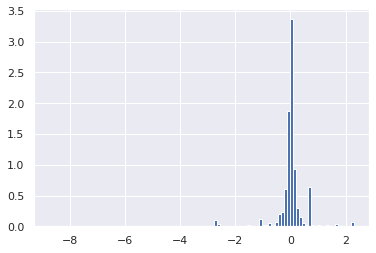

count    1807.000000
mean       -0.012137
std         0.567123
min        -8.746526
25%        -0.096596
50%        -0.008371
75%         0.083692
max         2.291061
Name: ret_-1, dtype: float64

In [136]:
ret_class = 'ret_-1'
dfg = df.copy()

buy = dfg['buy'].values
ret = dfg[ret_class].values
fig, ax = plt.subplots()

_ = ax.hist(dfg[ret_class].values, bins=100, density=True)
plt.show()

dfg[ret_class].describe()

## Conditional on Buy

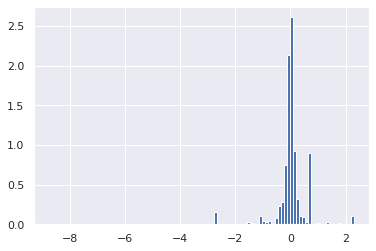

count    1156.000000
mean       -0.000480
std         0.614762
min        -8.746526
25%        -0.101729
50%        -0.009288
75%         0.099537
max         2.291061
Name: ret_-1, dtype: float64

In [137]:
dfg = df.loc[(df['buy']>0)]

buy = dfg['buy'].values
ret = dfg[ret_class].values

fig, ax = plt.subplots()

_ = ax.hist(ret,bins=100, density=True)
plt.show()

df.loc[(df['buy'] >0)][ret_class].describe()

## Conditional on Sell

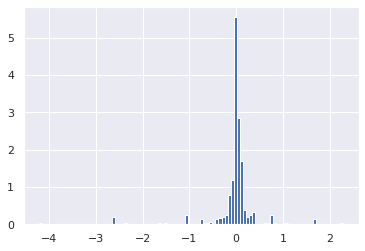

count    651.000000
mean      -0.032836
std        0.470537
min       -4.218411
25%       -0.040481
50%       -0.004980
75%        0.060379
max        2.291061
Name: ret_-1, dtype: float64

In [138]:
dfg = df.loc[(df['buy']<0)]

buy = dfg['buy'].values
ret = dfg[ret_class].values

fig, ax = plt.subplots()

_ = ax.hist(ret,bins=100, density=True)
plt.show()

df.loc[(df['buy'] <0)][ret_class].describe()

# Event

In [109]:
pd.read_csv(f'{WD}whale_swap/panel/panel_buy_ret.csv').sample(3)

,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3
2186,0.067202,0xd3752dd3753c48e0d30608252bf3252fd2c3ac4dd9c02b8b26f40a9fb20048ca-25,436,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-12-06 17:22:36,Wrapped Ether,Mew Inu,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe71221fbfcc55d49363c4a2286424b6dbecc368f,0xd3752dd3753c48e0d30608252bf3252fd2c3ac4dd9c02b8b26f40a9fb20048ca,1.603716e-05,0.0,0.000000e+00,5000.000,True,uniswapv2_ethereum,ethereum,0xff37a2c9c13b1f241864e433cdbd4efa6dc4b8fd,0xe71221FBFcc55d49363C4A2286424b6dBEcc368f,0xff37a2c9c13b1f241864e433cdbd4efa6dc4b8fd,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-0.067202,0.161539,0.241336,-0.406115,NaN,NaN,NaN
2417,1.201635,0xc0bceed58da07207850d27d355493cfc89ff443c05ca7bf5c4bafbccf568110d-0,204,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-08-18 13:35:48,DogeMaster,Wrapped BNB,0x62d24de6e01b3af7ce56aebeffe323810be15ba1,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xc0bceed58da07207850d27d355493cfc89ff443c05ca7bf5c4bafbccf568110d,1.654630e+10,0.0,0.000000e+00,0.003,True,pancake_binance,binance,0xa278d36f273a14665d82f5c8037db48c99972937,0x62d24de6e01b3af7ce56aebeffe323810be15ba1,0xa278d36f273a14665d82f5c8037db48c99972937,0xa278d36f273a14665d82f5c8037db48c99972937,False,1.201635,NaN,NaN,NaN,NaN,NaN,NaN
6143,8.984583,0x96ade212a8f589a6128fd2610f6f0251d07c44dc6a4f3d48488bbf65eb69cffd-0,67,NaN,NaN,0x60ae616a2155ee3d9a68541ba4544862310933d4,NaN,NaN,2021-12-09 11:57:17,Wrapped AVAX,MAX,0xb31f66aa3c1e785363f0875a1b74e27b85fd66c7,0xef6bbf76e3b89794d84db65ac82022d0b97a0efd,0x96ade212a8f589a6128fd2610f6f0251d07c44dc6a4f3d48488bbf65eb69cffd,0.000000e+00,0.1,5.365700e+11,0.000,True,traderjoe_avalanche,avalanche,0xaec0346bd9635cebad7bbd0fa8d0fe4282dbcb99,0xEF6BBF76E3b89794d84dB65ac82022D0B97a0efd,NaN,0xaec0346bd9635cebad7bbd0fa8d0fe4282dbcb99,False,8.984583,-0.009530,-0.107858,-0.135566,-1.063617,NaN,NaN


In [111]:
df = pd.read_csv(f'{WD}whale_swap/panel/panel_buy_ret.csv')
df['date'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d')

for day in [1, 2, 3]:
    df[f'event_{day}'] = False

dfs = []
for df_idx, df_row in df.drop_duplicates(['insider_contractAddress', 'chain']).iterrows():
    try:
        contractAddress = df_row['insider_contractAddress']
        chain = df_row['chain']
        
        dft = pd.read_csv(f'{WD}tweet_new/csv/{contractAddress.lower()}_tweets.csv')
        dft['date'] = pd.to_datetime(dft['timestamp']).dt.strftime('%Y-%m-%d')

        start = dft['date'].min()
        end = dft['date'].max()

        txn = df.loc[(df['insider_contractAddress'] == contractAddress)&
                     (df['chain'] == chain)&
                     (pd.to_datetime(df['date']) > pd.to_datetime(start) + datetime.timedelta(days=3))&
                     (pd.to_datetime(df['date']) < pd.to_datetime(end) - datetime.timedelta(days=3))].copy()

        dft['text'] = dft['text'].apply(lambda x: x.lower())
        dft = dft.loc[[True if re.search('listing', i) else False for i in dft['text']]]
        events = dft['date'].unique()

        for event in events:
            for idx, row in txn.iterrows():
                index = row['id']
                date = row['date']
                for day in [1, 2, 3]:
                    if (pd.to_datetime(date) > pd.to_datetime(event) - datetime.timedelta(days=day))&(pd.to_datetime(date) < pd.to_datetime(event) + datetime.timedelta(days=day)):
                        txn.loc[(txn['id'] == index), f'event_{day}'] = True

        dfs.append(txn)
        
    except: 
        pass

dfs = pd.concat(dfs)

In [112]:
df.shape[0]
dfs.shape[0]
for day in [1, 2, 3]:
    dfs[f'event_{day}'].value_counts()

6199

516

False    514
True       2
Name: event_1, dtype: int64

False    509
True       7
Name: event_2, dtype: int64

False    504
True      12
Name: event_3, dtype: int64

# Test

## Event

In [108]:
df = pd.read_csv(f'{WD}whale_swap/panel/panel_buy_ret.csv')
df['date'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d')

for day in [1, 2, 3]:
    df[f'event_{day}'] = False

dfs = []
for df_idx, df_row in df.drop_duplicates(['insider_contractAddress', 'chain']).iterrows():
    try:
        contractAddress = df_row['insider_contractAddress']
        chain = df_row['chain']
        
        dft = pd.read_csv(f'{WD}tweet_new/csv/{contractAddress.lower()}_tweets.csv')
        dft['date'] = pd.to_datetime(dft['timestamp']).dt.strftime('%Y-%m-%d')

        start = dft['date'].min()
        end = dft['date'].max()

        txn = df.loc[(df['insider_contractAddress'] == contractAddress)&
                     (df['chain'] == chain)&
                     (pd.to_datetime(df['date']) > pd.to_datetime(start) + datetime.timedelta(days=3))&
                     (pd.to_datetime(df['date']) < pd.to_datetime(end) - datetime.timedelta(days=3))].copy()

        dft['text'] = dft['text'].apply(lambda x: x.lower())
        dft = dft.loc[[True if re.search('listing', i) else False for i in dft['text']]]
        events = dft['date'].unique()

        for event in events:
            for idx, row in txn.iterrows():
                index = row['id']
                date = row['date']
                for day in [1, 2, 3]:
                    if (pd.to_datetime(date) > pd.to_datetime(event) - datetime.timedelta(days=day))&(pd.to_datetime(date) < pd.to_datetime(event) + datetime.timedelta(days=day)):
                        event
                        day
                        contractAddress
                        chain
                        dft.loc[dft['date'] == event]
                        txn.loc[(txn['id'] == index)]
                        txn.loc[(txn['id'] == index), f'event_{day}'] = True

        dfs.append(txn)
        
    except: 
        pass

dfs = pd.concat(dfs)

'2021-11-14'

2

'0x467f4773879a3917ddc2a6befa430c5d8ac22bee'

'binance'

,timestamp,text,date
54,2021-11-14 14:10:19+00:00,🎉 dragonsea $dgg is listing on pancakeswap 🚀\n\n⚡️dragonsea is thrilled to announce that $dgg is...,2021-11-14


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2567,3202.255378,0x68d68c0d4b18459f5db3b2a209daa1b01a9471153d005e902dc342b5590152b0-0,1006,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-11-13 12:51:49,DragonSea,BUSD Token,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x68d68c0d4b18459f5db3b2a209daa1b01a9471153d005e902dc342b5590152b0,0.0,31826.164854,3200.0,0.0,True,pancake_binance,binance,0xad6448f334699aef86817a98843063ef9fcaefe5,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xad6448f334699aef86817a98843063ef9fcaefe5,0xad6448f334699aef86817a98843063ef9fcaefe5,False,-3202.255378,-0.139882,-0.255691,-0.242649,0.331577,0.28559,0.758186,2021-11-13,False,False,False


'2021-11-14'

3

'0x467f4773879a3917ddc2a6befa430c5d8ac22bee'

'binance'

,timestamp,text,date
54,2021-11-14 14:10:19+00:00,🎉 dragonsea $dgg is listing on pancakeswap 🚀\n\n⚡️dragonsea is thrilled to announce that $dgg is...,2021-11-14


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2567,3202.255378,0x68d68c0d4b18459f5db3b2a209daa1b01a9471153d005e902dc342b5590152b0-0,1006,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-11-13 12:51:49,DragonSea,BUSD Token,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x68d68c0d4b18459f5db3b2a209daa1b01a9471153d005e902dc342b5590152b0,0.0,31826.164854,3200.0,0.0,True,pancake_binance,binance,0xad6448f334699aef86817a98843063ef9fcaefe5,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xad6448f334699aef86817a98843063ef9fcaefe5,0xad6448f334699aef86817a98843063ef9fcaefe5,False,-3202.255378,-0.139882,-0.255691,-0.242649,0.331577,0.28559,0.758186,2021-11-13,False,True,False


'2021-11-14'

1

'0x467f4773879a3917ddc2a6befa430c5d8ac22bee'

'binance'

,timestamp,text,date
54,2021-11-14 14:10:19+00:00,🎉 dragonsea $dgg is listing on pancakeswap 🚀\n\n⚡️dragonsea is thrilled to announce that $dgg is...,2021-11-14


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2568,1532.839945,0xb49d5dd6e3e259f4757c2042aa2b9284350c2ec59c11151c4ab4d6fa3a79aef7-0,565,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-11-14 01:00:50,DragonSea,BUSD Token,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xe9e7cea3dedca5984780bafc599bd69add087d56,0xb49d5dd6e3e259f4757c2042aa2b9284350c2ec59c11151c4ab4d6fa3a79aef7,0.0,19950.510638,1533.0,0.0,True,pancake_binance,binance,0xad6448f334699aef86817a98843063ef9fcaefe5,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xad6448f334699aef86817a98843063ef9fcaefe5,0xad6448f334699aef86817a98843063ef9fcaefe5,False,-1532.839945,-0.115809,-0.102767,-0.082743,0.289118,0.620695,0.574707,2021-11-14,False,False,False


'2021-11-14'

2

'0x467f4773879a3917ddc2a6befa430c5d8ac22bee'

'binance'

,timestamp,text,date
54,2021-11-14 14:10:19+00:00,🎉 dragonsea $dgg is listing on pancakeswap 🚀\n\n⚡️dragonsea is thrilled to announce that $dgg is...,2021-11-14


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2568,1532.839945,0xb49d5dd6e3e259f4757c2042aa2b9284350c2ec59c11151c4ab4d6fa3a79aef7-0,565,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-11-14 01:00:50,DragonSea,BUSD Token,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xe9e7cea3dedca5984780bafc599bd69add087d56,0xb49d5dd6e3e259f4757c2042aa2b9284350c2ec59c11151c4ab4d6fa3a79aef7,0.0,19950.510638,1533.0,0.0,True,pancake_binance,binance,0xad6448f334699aef86817a98843063ef9fcaefe5,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xad6448f334699aef86817a98843063ef9fcaefe5,0xad6448f334699aef86817a98843063ef9fcaefe5,False,-1532.839945,-0.115809,-0.102767,-0.082743,0.289118,0.620695,0.574707,2021-11-14,True,False,False


'2021-11-14'

3

'0x467f4773879a3917ddc2a6befa430c5d8ac22bee'

'binance'

,timestamp,text,date
54,2021-11-14 14:10:19+00:00,🎉 dragonsea $dgg is listing on pancakeswap 🚀\n\n⚡️dragonsea is thrilled to announce that $dgg is...,2021-11-14


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2568,1532.839945,0xb49d5dd6e3e259f4757c2042aa2b9284350c2ec59c11151c4ab4d6fa3a79aef7-0,565,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-11-14 01:00:50,DragonSea,BUSD Token,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xe9e7cea3dedca5984780bafc599bd69add087d56,0xb49d5dd6e3e259f4757c2042aa2b9284350c2ec59c11151c4ab4d6fa3a79aef7,0.0,19950.510638,1533.0,0.0,True,pancake_binance,binance,0xad6448f334699aef86817a98843063ef9fcaefe5,0x467f4773879a3917ddc2a6befa430c5d8ac22bee,0xad6448f334699aef86817a98843063ef9fcaefe5,0xad6448f334699aef86817a98843063ef9fcaefe5,False,-1532.839945,-0.115809,-0.102767,-0.082743,0.289118,0.620695,0.574707,2021-11-14,True,True,False


'2021-12-23'

1

'0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7'

'binance'

,timestamp,text,date
70,2021-12-23 18:11:54+00:00,get ready… for cmc listing!\n\n#crypto #mreit #metaverse,2021-12-23


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2683,1643.468118,0x5ccbce86013b3f6e28b2d509f4e401b6e1ce73a435de52b78fdd6463ffdbcca1-1,67,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-23 20:54:01,MetaSpace REIT,BUSD Token,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x5ccbce86013b3f6e28b2d509f4e401b6e1ce73a435de52b78fdd6463ffdbcca1,17709.208493,0.0,0.0,1643.614663,True,pancake_binance,binance,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,False,1643.468118,0.517206,0.276038,0.488944,-0.698568,0.926386,1.120657,2021-12-23,False,False,False


'2021-12-23'

2

'0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7'

'binance'

,timestamp,text,date
70,2021-12-23 18:11:54+00:00,get ready… for cmc listing!\n\n#crypto #mreit #metaverse,2021-12-23


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2683,1643.468118,0x5ccbce86013b3f6e28b2d509f4e401b6e1ce73a435de52b78fdd6463ffdbcca1-1,67,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-23 20:54:01,MetaSpace REIT,BUSD Token,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x5ccbce86013b3f6e28b2d509f4e401b6e1ce73a435de52b78fdd6463ffdbcca1,17709.208493,0.0,0.0,1643.614663,True,pancake_binance,binance,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,False,1643.468118,0.517206,0.276038,0.488944,-0.698568,0.926386,1.120657,2021-12-23,True,False,False


'2021-12-23'

3

'0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7'

'binance'

,timestamp,text,date
70,2021-12-23 18:11:54+00:00,get ready… for cmc listing!\n\n#crypto #mreit #metaverse,2021-12-23


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2683,1643.468118,0x5ccbce86013b3f6e28b2d509f4e401b6e1ce73a435de52b78fdd6463ffdbcca1-1,67,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-23 20:54:01,MetaSpace REIT,BUSD Token,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x5ccbce86013b3f6e28b2d509f4e401b6e1ce73a435de52b78fdd6463ffdbcca1,17709.208493,0.0,0.0,1643.614663,True,pancake_binance,binance,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,False,1643.468118,0.517206,0.276038,0.488944,-0.698568,0.926386,1.120657,2021-12-23,True,True,False


'2021-12-23'

2

'0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7'

'binance'

,timestamp,text,date
70,2021-12-23 18:11:54+00:00,get ready… for cmc listing!\n\n#crypto #mreit #metaverse,2021-12-23


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2687,327.873599,0x965d4f9bb4c56dc35a61572757ac46d0d99369fb7fa494745935db1c9f65d1e8-1,178,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-24 14:03:07,MetaSpace REIT,BUSD Token,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x965d4f9bb4c56dc35a61572757ac46d0d99369fb7fa494745935db1c9f65d1e8,2893.859421,0.0,0.0,327.990218,True,pancake_binance,binance,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,False,327.873599,-0.241168,-0.028262,-0.22797,-0.403038,-1.101605,0.523348,2021-12-24,False,False,False


'2021-12-23'

3

'0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7'

'binance'

,timestamp,text,date
70,2021-12-23 18:11:54+00:00,get ready… for cmc listing!\n\n#crypto #mreit #metaverse,2021-12-23


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2687,327.873599,0x965d4f9bb4c56dc35a61572757ac46d0d99369fb7fa494745935db1c9f65d1e8-1,178,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-24 14:03:07,MetaSpace REIT,BUSD Token,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x965d4f9bb4c56dc35a61572757ac46d0d99369fb7fa494745935db1c9f65d1e8,2893.859421,0.0,0.0,327.990218,True,pancake_binance,binance,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x0b45166d0b58a0dd8e805b352d7adee3f81ac6e7,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,0x36c5d4c630f4e4758198fedd3b980d9b4e12b51f,False,327.873599,-0.241168,-0.028262,-0.22797,-0.403038,-1.101605,0.523348,2021-12-24,False,True,False


'2021-12-13'

3

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2900,561.795991,0x1fd3e2b3c0cc71a3b1527c0ac9f62ed62a010f1f8135a11b5e06e8ad56c7845a-0,1118,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-15 11:56:49,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x1fd3e2b3c0cc71a3b1527c0ac9f62ed62a010f1f8135a11b5e06e8ad56c7845a,1.065341,0.0,0.0,115960000.0,True,pancake_binance,binance,0x5571711417efbc37aab489e6082ba2181caf71e7,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x5571711417efbc37aab489e6082ba2181caf71e7,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-561.795991,-0.038894,-0.066776,-0.042865,0.014706,0.049783,0.01967,2021-12-15,False,False,False


'2021-12-13'

3

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2915,1053.950075,0x6bc23dc2cec12863b9eb997be3db74f53d59c5746a76aa58fd1facca4178cc57-0,535,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-15 12:12:13,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x6bc23dc2cec12863b9eb997be3db74f53d59c5746a76aa58fd1facca4178cc57,2.0,0.0,0.0,2.273225e+08,True,pancake_binance,binance,0x5571711417efbc37aab489e6082ba2181caf71e7,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x5571711417efbc37aab489e6082ba2181caf71e7,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-1053.950075,-0.038894,-0.066776,-0.042865,0.014706,0.049783,0.01967,2021-12-15,False,False,False


'2021-12-13'

3

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2923,529.466972,0x9e1cb9ffab9f494e0230e58552f8293b7662562f1962784d6cb41219c977d97f-0,552,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-11 08:56:22,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x9e1cb9ffab9f494e0230e58552f8293b7662562f1962784d6cb41219c977d97f,0.960064,0.0,0.0,130000000.0,True,pancake_binance,binance,0x5571711417efbc37aab489e6082ba2181caf71e7,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x5571711417efbc37aab489e6082ba2181caf71e7,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-529.466972,-0.030113,0.004964,0.01967,0.073872,0.065065,0.009923,2021-12-11,False,False,False


'2021-12-13'

3

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2933,1528.744263,0xc505dd6f14cccee254540a6be876a88d59c93da28f9b0253fcb87e219142709a-0,244,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-15 03:48:31,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xc505dd6f14cccee254540a6be876a88d59c93da28f9b0253fcb87e219142709a,2.900556,0.0,0.0,350461201.0,True,pancake_binance,binance,0x5571711417efbc37aab489e6082ba2181caf71e7,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x5571711417efbc37aab489e6082ba2181caf71e7,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-1528.744263,-0.038894,-0.066776,-0.042865,0.014706,0.049783,0.01967,2021-12-15,False,False,False


'2021-12-13'

3

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2936,597.697848,0xe0c2990b2079fdb8b14e8b1acb40d160367f35ca7378c77657c1fc04cc757437-0,1049,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-15 11:50:01,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xe0c2990b2079fdb8b14e8b1acb40d160367f35ca7378c77657c1fc04cc757437,1.134579,0.0,0.0,120102000.0,True,pancake_binance,binance,0x5571711417efbc37aab489e6082ba2181caf71e7,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x5571711417efbc37aab489e6082ba2181caf71e7,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-597.697848,-0.038894,-0.066776,-0.042865,0.014706,0.049783,0.01967,2021-12-15,False,False,False


'2021-12-13'

2

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2940,510.760377,0xf372ff7d4902b4b1a62e89004040c0ca299d28cdf17484500b7c7cd9cccce470-0,359,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-12 09:58:46,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xf372ff7d4902b4b1a62e89004040c0ca299d28cdf17484500b7c7cd9cccce470,0.907121,0.0,0.0,130000000.0,True,pancake_binance,binance,0x5571711417efbc37aab489e6082ba2181caf71e7,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x5571711417efbc37aab489e6082ba2181caf71e7,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-510.760377,0.035076,0.049783,0.160399,-0.074321,-0.000448,-0.009256,2021-12-12,False,False,False


'2021-12-13'

3

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2940,510.760377,0xf372ff7d4902b4b1a62e89004040c0ca299d28cdf17484500b7c7cd9cccce470-0,359,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-12 09:58:46,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xf372ff7d4902b4b1a62e89004040c0ca299d28cdf17484500b7c7cd9cccce470,0.907121,0.0,0.0,130000000.0,True,pancake_binance,binance,0x5571711417efbc37aab489e6082ba2181caf71e7,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0x5571711417efbc37aab489e6082ba2181caf71e7,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-510.760377,0.035076,0.049783,0.160399,-0.074321,-0.000448,-0.009256,2021-12-12,False,True,False


'2021-12-13'

2

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2945,482.981409,0xfb4c9d79d34735d4f17520c618db0f42647fa215d7a58f81e134e3b778f20ac4-0,357,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-14 11:21:11,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xfb4c9d79d34735d4f17520c618db0f42647fa215d7a58f81e134e3b778f20ac4,0.923861,0.0,0.0,115000423.0,True,pancake_binance,binance,0xb40c564645703babccc1bcf4e383cdc7e3f96b05,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xb40c564645703babccc1bcf4e383cdc7e3f96b05,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-482.981409,0.110616,0.071722,0.04384,0.035076,0.004964,-0.069357,2021-12-14,False,False,False


'2021-12-13'

3

'0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26'

'binance'

,timestamp,text,date
303,2021-12-13 07:52:17+00:00,rt @coinlistings: 🆕 new coingecko listing: $shl \nhttps://t.co/d8frm4yii6,2021-12-13


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
2945,482.981409,0xfb4c9d79d34735d4f17520c618db0f42647fa215d7a58f81e134e3b778f20ac4-0,357,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2021-12-14 11:21:11,Wrapped BNB,shelling,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xfb4c9d79d34735d4f17520c618db0f42647fa215d7a58f81e134e3b778f20ac4,0.923861,0.0,0.0,115000423.0,True,pancake_binance,binance,0xb40c564645703babccc1bcf4e383cdc7e3f96b05,0xbb689057fe1c4bfc573a54c0679ae1a7a1982f26,0xb40c564645703babccc1bcf4e383cdc7e3f96b05,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-482.981409,0.110616,0.071722,0.04384,0.035076,0.004964,-0.069357,2021-12-14,False,True,False


'2022-08-01'

3

'0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5'

'binance'

,timestamp,text,date
75,2022-08-01 07:30:10+00:00,rt @thegempad: 💎 spume listing announcement 💎\n\n🟣 diamond tier 🟣\n\nbringing you all yet anothe...,2022-08-01


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
3206,71167.615819,0x354cfcbc48da5d7b445eb34b9f132680a631b79a9a33c9e05db55165f4faf12b-0,16,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2022-07-30 02:59:42,Spume Protocol,Wrapped BNB,0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x354cfcbc48da5d7b445eb34b9f132680a631b79a9a33c9e05db55165f4faf12b,0.0,9.800000e+14,238.64646,0.0,True,pancake_binance,binance,0xb292e4d375df31be440b3cfc7577f2fcebab8417,0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5,0xb292e4d375df31be440b3cfc7577f2fcebab8417,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-71167.615819,NaN,-24.514032,NaN,NaN,NaN,NaN,2022-07-30,False,False,False


'2022-07-29'

2

'0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5'

'binance'

,timestamp,text,date
83,2022-07-29 20:22:42+00:00,rt @kingdomgame_kdg: 📢 strategic partnership announcement: kingdom game 4.0 x @spumeio ♒\n\n🤝ido...,2022-07-29


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
3206,71167.615819,0x354cfcbc48da5d7b445eb34b9f132680a631b79a9a33c9e05db55165f4faf12b-0,16,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2022-07-30 02:59:42,Spume Protocol,Wrapped BNB,0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x354cfcbc48da5d7b445eb34b9f132680a631b79a9a33c9e05db55165f4faf12b,0.0,9.800000e+14,238.64646,0.0,True,pancake_binance,binance,0xb292e4d375df31be440b3cfc7577f2fcebab8417,0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5,0xb292e4d375df31be440b3cfc7577f2fcebab8417,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-71167.615819,NaN,-24.514032,NaN,NaN,NaN,NaN,2022-07-30,False,False,True


'2022-07-29'

3

'0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5'

'binance'

,timestamp,text,date
83,2022-07-29 20:22:42+00:00,rt @kingdomgame_kdg: 📢 strategic partnership announcement: kingdom game 4.0 x @spumeio ♒\n\n🤝ido...,2022-07-29


,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date,event_1,event_2,event_3
3206,71167.615819,0x354cfcbc48da5d7b445eb34b9f132680a631b79a9a33c9e05db55165f4faf12b-0,16,NaN,NaN,0x10ed43c718714eb63d5aa57b78b54704e256024e,NaN,NaN,2022-07-30 02:59:42,Spume Protocol,Wrapped BNB,0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x354cfcbc48da5d7b445eb34b9f132680a631b79a9a33c9e05db55165f4faf12b,0.0,9.800000e+14,238.64646,0.0,True,pancake_binance,binance,0xb292e4d375df31be440b3cfc7577f2fcebab8417,0xa10a9148d65aea4fe3d08db8edc16f5e978d7ec5,0xb292e4d375df31be440b3cfc7577f2fcebab8417,0x10ed43c718714eb63d5aa57b78b54704e256024e,False,-71167.615819,NaN,-24.514032,NaN,NaN,NaN,NaN,2022-07-30,False,True,True


## Extreme Return

In [82]:
df.sort_values('ret_1', ascending=True).head(5)

,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_Address,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3
1309,14530.727145,0x7ada5ee5ab1a4d35611722f50db6cb83da8e700194666e78bf576bfe5bd174ec-0,67,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-11-10 15:46:36,Clash Of Stars,Wrapped Ether,0x65f93fa32c1d2b7f29ff5f3a3b4be0fb9991084d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7ada5ee5ab1a4d35611722f50db6cb83da8e700194666e78bf576bfe5bd174ec,8.699728e+06,0.0,0.0,3.000000,True,uniswapv2_ethereum,ethereum,0xacbb25b917452765dcae200289068e8e7cf9d97d,0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d,0xacbb25b917452765dcae200289068e8e7cf9d97d,0xafa55da01a1db8f8f3b967ffa51380fc0413203e,False,14530.727145,-30.677179,NaN,NaN,NaN,NaN,NaN
1314,14924.091237,0xeba5481a29e55f4496d898fef06bee148845cc94594d2e83c3c762db4b667e4d-0,320,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-11-10 13:54:13,Clash Of Stars,Wrapped Ether,0x65f93fa32c1d2b7f29ff5f3a3b4be0fb9991084d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xeba5481a29e55f4496d898fef06bee148845cc94594d2e83c3c762db4b667e4d,7.872917e+07,0.0,0.0,3.000000,True,uniswapv2_ethereum,ethereum,0xacbb25b917452765dcae200289068e8e7cf9d97d,0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d,0xacbb25b917452765dcae200289068e8e7cf9d97d,0x48e1f8f67225118063809a2e468175d54efe8c4e,False,14924.091237,-30.677179,NaN,NaN,NaN,NaN,NaN
1313,13802.453015,0xdf780defc6f0bdf0d7b8e080c708a9b09154205653a0847f57d9c37b6b794c61-0,351,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-11-10 16:31:56,Clash Of Stars,Wrapped Ether,0x65f93fa32c1d2b7f29ff5f3a3b4be0fb9991084d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf780defc6f0bdf0d7b8e080c708a9b09154205653a0847f57d9c37b6b794c61,7.199037e+06,0.0,0.0,2.840000,True,uniswapv2_ethereum,ethereum,0xacbb25b917452765dcae200289068e8e7cf9d97d,0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d,0xacbb25b917452765dcae200289068e8e7cf9d97d,0xb433bfd9c6524f2b4a6db24ee50273508e65f69d,False,13802.453015,-30.677179,NaN,NaN,NaN,NaN,NaN
1311,17543.291693,0x932093526c8a40c84e4be81edf77d96488b265e2222252362cd22cc83344f92e-0,212,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-11-10 15:00:43,Clash Of Stars,Wrapped Ether,0x65f93fa32c1d2b7f29ff5f3a3b4be0fb9991084d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x932093526c8a40c84e4be81edf77d96488b265e2222252362cd22cc83344f92e,1.650674e+07,0.0,0.0,3.620000,True,uniswapv2_ethereum,ethereum,0xacbb25b917452765dcae200289068e8e7cf9d97d,0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d,0xacbb25b917452765dcae200289068e8e7cf9d97d,0x66a5033a5b28bb5cd7af6f4bc27a39db6cf3bb98,False,17543.291693,-30.677179,NaN,NaN,NaN,NaN,NaN
1310,10310.376946,0x7dd152c44adabf939b2439dc5ecb7814260e1de935e41409f23e2f791d77feaf-0,334,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-11-10 14:44:56,Clash Of Stars,Wrapped Ether,0x65f93fa32c1d2b7f29ff5f3a3b4be0fb9991084d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7dd152c44adabf939b2439dc5ecb7814260e1de935e41409f23e2f791d77feaf,1.158737e+07,0.0,0.0,2.137276,True,uniswapv2_ethereum,ethereum,0xacbb25b917452765dcae200289068e8e7cf9d97d,0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d,0xacbb25b917452765dcae200289068e8e7cf9d97d,0xa78d2c69b34cab96cace31967afe52013dfcb604,False,10310.376946,-30.677179,NaN,NaN,NaN,NaN,NaN


In [91]:
after = True
day = 1 
contract = '0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d'
chain = 'ethereum'
timestamp = '2021-11-10 15:46:36'

if after == True:
    start_date = pd.to_datetime(timestamp)
    end_date = pd.to_datetime(timestamp) + datetime.timedelta(days=day)

    start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
    end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)

else:
    start_date = pd.to_datetime(timestamp) - datetime.timedelta(days=day+1)
    end_date = pd.to_datetime(timestamp) - datetime.timedelta(days=1)

    start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
    end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)

start_date
end_date

start_price
end_price
np.log(end_price/start_price)

Timestamp('2021-11-10 15:46:36')

Timestamp('2021-11-11 15:46:36')

0.0021034374354735

1e-16

-30.677179089468797

In [95]:
contract = '0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d'
chain = 'ethereum'
timestamp = pd.to_datetime('2021-11-10 15:46:36')
    
contractAddress_lower = contract.lower()
contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)

date = timestamp.strftime('%Y-%m-%d')

priceUSD = 0
dex_num = 0
avg_priceUSD = 0

for dex in chain_info(chain):
    dex
    lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
    csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                        (lst['contractAddress'] == contractAddress_upper))]

    if csv_info['contractAddress'].values[0] == contractAddress_lower:
        contractAddress = contractAddress_lower
    else:
        contractAddress = contractAddress_upper

    status = csv_info['status'].values[0]
    dexn = csv_info['dex'].values[0]

    if status == 0: 
        continue
    elif dexn == 0:
        continue
    else:
        csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
        price_info = csv.loc[(pd.to_datetime(csv['date']) > pd.to_datetime(timestamp) - datetime.timedelta(days=1))&
                          (pd.to_datetime(csv['date']) < pd.to_datetime(timestamp))]
        price_info

        if price_info.shape[0] != 0:
            price = price_info['priceUSD'].values[0]
            if price != 0:  
                priceUSD += price
                dex_num += 1

'uniswapv3_ethereum'

'uniswapv2_ethereum'

,id,dailyTxns,dailyVolumeETH,dailyVolumeToken,dailyVolumeUSD,date,priceUSD,totalLiquidityETH,totalLiquidityToken,totalLiquidityUSD,token_decimals,token_derivedETH,token_id,token_name,token_symbol,token_totalLiquidity,token_tradeVolume,token_totalSupply,token_tradeVolumeUSD,token_txCount,token_untrackedVolumeUSD
0,0x65f93fa32c1d2b7f29ff5f3a3b4be0fb9991084d-18941,133,7.266641e+08,7.266641e+08,450327.63535,2021-11-10,0.002103,124.208234,2.828559e+08,594969.648555,18,0.0,0x65f93fa32c1d2b7f29ff5f3a3b4be0fb9991084d,Clash Of Stars,GALAXY,1.000000e+15,1.000001e+15,14448,406599.240269,135,736849.00374


'sushiswap_ethereum'

uniswapv2_ethereum


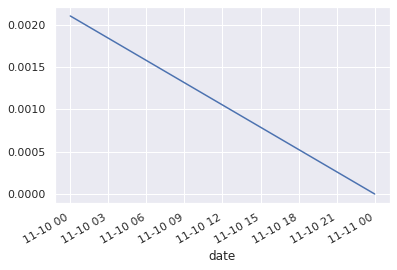

In [94]:
token_price_chart(contract='0x65f93FA32C1D2b7F29ff5f3a3B4BE0fB9991084d',
                  chain='ethereum')

## Spider

In [123]:
holders(tokencontract='0x55ff87a41e4438e37bc53242a92689e4423a5874',
        chain='avalanche')

,Rank,Address,Quantity,Percentage
0,1,0xe2fe530c047f2d85298b07d9333c05737f1435fb,980,98.0000%
1,2,0x84d34f4f83a87596cd3fb6887cff8f17bf5a7b83,7.5,0.7500%
2,3,0x6d39f483a085fd41f68d02f618eed638758263eb,5.08942454,0.5089%
3,4,0xb1bc5fac6a082f59c97f2989b3c31b5996d3a483,5,0.5000%
4,5,0x367f3fb9e8ee7e4f496b07ec47a8d9b77734fc8a,1,0.1000%
5,6,0x69091886030d2825573249f015f893f0f91dc526,0.61057527,0.0611%
6,7,0xbc8b65af80c9e3031033067799055a697520bef8,0.5,0.0500%
7,8,Null Address: 0x000...dEaD,0.1,0.0100%
8,9,0x47728be496baf31e71d81463426137926bcab164,0.1,0.0100%
9,10,0xeea90ac8c06c1d1b76c4332c12ceae927aad2e69,0.1,0.0100%


In [45]:
url = 'https://etherscan.io/token/tokenholderchart/0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}
r = requests.get(url=url, headers=headers)
bs = BeautifulSoup(r.text)

In [22]:
holders = bs.find('tbody').find_all('tr')
ranks = []
addresses = []
quantities = []
percentages = []

for holder in holders:
    rank = holder.find_all('td')[0].text
    address = holder.find('a').text
    quantity = holder.find_all('td')[2].text
    percentage = holder.find_all('td')[3].text

    
    ranks.append(rank)
    addresses.append(address)
    quantities.append(quantity)
    percentages.append(percentage)
    
pd.DataFrame({'Rank':ranks,
              'Address':addresses,
              'Quantity':quantities,
              'Percentage':percentages,})

NameError: name 'bs' is not defined

# Function

In [31]:
def contract(address, chian):
    
    if chain == 'ethereum': rpc = 'https://rpc.ankr.com/eth'
    if chain == 'binance': rpc = 'https://bscrpc.com'
    if chain == 'avalanche': rpc = 'https://api.avax.network/ext/bc/C/rpc'
    if chain == 'fantom': rpc = 'https://rpc.ftm.tools'
    if chain == 'polygon': rpc = 'https://polygon-rpc.com'

    w3 = Web3(Web3.HTTPProvider(rpc))
    contract = w3.eth.getCode(w3.toChecksumAddress(address)).hex() != '0x'

    return contract

In [32]:
def holders(tokencontract, chain):
    time.sleep(2 + random.random()*2)
    if chain == 'ethereum': url = f'https://etherscan.io/token/tokenholderchart/{tokencontract}'
    if chain == 'binance': url = f'https://bscscan.com/token/tokenholderchart/{tokencontract}'
    if chain == 'polygon': url = f'https://polygonscan.com/token/tokenholderchart/{tokencontract}'
    if chain == 'fantom': url = f'https://ftmscan.com/token/tokenholderchart/{tokencontract}'
    if chain == 'avalanche': url = f'https://snowtrace.io/token/tokenholderchart/{tokencontract}'
    
    headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}
    
    r = requests.get(url=url, headers=headers)
    bs = BeautifulSoup(r.text)
    holders = bs.find('tbody').find_all('tr')
    ranks = []
    addresses = []
    quantities = []
    percentages = []
    if len(holders) != 0:
        for holder in holders:
            rank = holder.find_all('td')[0].text
            address = holder.find('a').text
            quantity = holder.find_all('td')[2].text
            percentage = holder.find_all('td')[3].text


            ranks.append(rank)
            addresses.append(address)
            quantities.append(quantity)
            percentages.append(percentage)

        return pd.DataFrame({'Rank':ranks,
                             'Address':addresses,
                             'Quantity':quantities,
                             'Percentage':percentages,})
    else:
        return []

In [33]:
def token_return(after, day, contract, chain, timestamp):
    if after == True:
        start_date = pd.to_datetime(timestamp)
        end_date = pd.to_datetime(timestamp) + datetime.timedelta(days=day)
        
        start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
        end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)
        
    else:
        start_date = pd.to_datetime(timestamp) - datetime.timedelta(days=day+1)
        end_date = pd.to_datetime(timestamp) - datetime.timedelta(days=1)
        
        start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
        end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)
    
    if (end_price == 0)|(start_price==0):
        return np.nan
    else:
        return np.log(end_price/start_price)
    
def token_return_date(after, day, contract, chain, date):
    if after == True:
        start_date = pd.to_datetime(date)
        end_date = pd.to_datetime(date) + datetime.timedelta(days=day)
        
        start_price = token_dollar_price_date(contract=contract, chain=chain, date=start_date)
        end_price = token_dollar_price_date(contract=contract, chain=chain, date=end_date)
        
    else:
        start_date = pd.to_datetime(date) - datetime.timedelta(days=day+1)
        end_date = pd.to_datetime(date) - datetime.timedelta(days=1)
        
        start_price = token_dollar_price_date(contract=contract, chain=chain, date=start_date)
        end_price = token_dollar_price_date(contract=contract, chain=chain, date=end_date)
    
    if (end_price == 0)|(start_price==0):
        return np.nan
    else:
        return np.log(end_price/start_price)

In [34]:
def token_dollar_price(contract, chain, timestamp):
    
        contractAddress_lower = contract.lower()
        contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)

        date = timestamp.strftime('%Y-%m-%d')
        
        priceUSD = 0
        dex_num = 0
        avg_priceUSD = 0

        for dex in chain_info(chain):
            lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
            csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                                (lst['contractAddress'] == contractAddress_upper))]
            
            if csv_info['contractAddress'].values[0] == contractAddress_lower:
                contractAddress = contractAddress_lower
            else:
                contractAddress = contractAddress_upper

            status = csv_info['status'].values[0]
            dexn = csv_info['dex'].values[0]

            if status == 0: 
                continue
            elif dexn == 0:
                continue
            else:
                csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
                price_info = csv.loc[(pd.to_datetime(csv['date']) > pd.to_datetime(timestamp) - datetime.timedelta(days=1))&
                                  (pd.to_datetime(csv['date']) < pd.to_datetime(timestamp))]
                
                if price_info.shape[0] != 0:
                    price = price_info['priceUSD'].values[0]
                    if price != 0:  
                        priceUSD += price
                        dex_num += 1

        if dex_num != 0: 
            return priceUSD/dex_num
        if dex_num == 0:
            return 0
        
def token_dollar_price_date(contract, chain, date):
    
        contractAddress_lower = contract.lower()
        contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)
        
        priceUSD = 0
        dex_num = 0
        avg_priceUSD = 0

        for dex in chain_info(chain):
            lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
            csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                                (lst['contractAddress'] == contractAddress_upper))]
            
            if csv_info['contractAddress'].values[0] == contractAddress_lower:
                contractAddress = contractAddress_lower
            else:
                contractAddress = contractAddress_upper

            status = csv_info['status'].values[0]
            dexn = csv_info['dex'].values[0]

            if status == 0: 
                continue
            elif dexn == 0:
                continue
            else:
                csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
                price_info = csv.loc[(pd.to_datetime(csv['date']) == pd.to_datetime(date))]
                
                if price_info.shape[0] != 0:
                    price = price_info['priceUSD'].values[0]
                    if price != 0:  
                        priceUSD += price
                        dex_num += 1

        if dex_num != 0: 
            return priceUSD/dex_num
        if dex_num == 0:
            return 0

In [50]:
def set_buy(df):

    
    for idx, row in df.iterrows():
        index = row['id']
        insider_contractAddress = row['insider_contractAddress'].lower()
        token0_id = row['token0_id'].lower()
        token1_id = row['token1_id'].lower()

        amount0Out = row['amount0Out']
        amount0In = row['amount0In']
        amount1Out = row['amount1Out']
        amount1In = row['amount1In']
        amountUSD = row['amountUSD']

        if insider_contractAddress == token0_id:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = - amountUSD

        else:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = - amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = amountUSD
            
    return df

In [36]:
def insider_transaction(address, dex):
    

    dfs = []
    for role in dex_info(dex)['role']:

        post = {"query":dex_info(dex)['post'].substitute({'role': role, 'address':address})}
        url = dex_info(dex)['url']

        r = requests.post(url, json=post)
        data = r.json()
        df = pd.DataFrame.from_dict(data['data']['swaps'])

        if df.shape[0] == 0:
            continue

        if dex_info(dex)['style'] == 0:
            df['token0_name'] = df['token0'].apply(lambda x: x['name'])
            df['token1_name'] = df['token1'].apply(lambda x: x['name'])
            df['token0_id'] = df['token0'].apply(lambda x: x['id'])
            df['token1_id'] = df['token1'].apply(lambda x: x['id'])
            df['transaction_id'] = df['transaction'].apply(lambda x: x['id'])
            df.drop(columns=['token0', 'token1', 'transaction'], inplace=True)
        else:
            if dex_info(dex)['style'] == 1:
                df['token0_name'] = df['pair'].apply(lambda x: x['token0']['name'])
                df['token1_name'] = df['pair'].apply(lambda x: x['token1']['name'])
                df['token0_id'] = df['pair'].apply(lambda x: x['token0']['id'])
                df['token1_id'] = df['pair'].apply(lambda x: x['token1']['id'])
                df['transaction_id'] = df['transaction'].apply(lambda x: x['id'])
                df.drop(columns=['pair', 'transaction'], inplace=True)
        
        df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s', origin='unix')
        
        if dex == 'uniswapv3_ethereum': df = uniswapv3_correction(df)
        
        df = df.loc[df[role] == address]
        if df.shape[0] == 0:
            continue

        dfs.append(df)

    if len(dfs) != 0: 
        dfs = pd.concat(dfs)
        dfs.drop_duplicates('id', inplace=True)

    return dfs

In [37]:
def uniswapv3_correction(df):
    
    df['amount0'] = df['amount0'].astype('float')
    df['amount1'] = df['amount1'].astype('float')
    for idx, row in df.iterrows():
        if row['amount0'] > 0:
            df.loc[df['id'] == row['id'], 'amount0Out'] = 0
            df.loc[df['id'] == row['id'], 'amount0In'] = abs(row['amount0'])
            df.loc[df['id'] == row['id'], 'amount1Out'] = abs(row['amount1'])
            df.loc[df['id'] == row['id'], 'amount1In'] = 0

        else:
            df.loc[df['id'] == row['id'], 'amount0Out'] = abs(row['amount0'])
            df.loc[df['id'] == row['id'], 'amount0In'] = 0
            df.loc[df['id'] == row['id'], 'amount1Out'] = 0
            df.loc[df['id'] == row['id'], 'amount1In'] = abs(row['amount1'])
    df.drop(columns=['amount1', 'amount0'], inplace=True)
    return df

In [38]:
def dex_info(dex):
    dex_infos = {
                'uniswapv3_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3',
                                       'role': 1,
                                       'style': 0,
                                       'post': 1
                                      },
                
                'uniswapv2_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'sushiswap_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/sushiswap/exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },
        
                'pancake_binance':{'url': 'https://bsc.streamingfast.io/subgraphs/name/pancakeswap/exchange-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'biswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/biswapcom/exchange5',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'apeswap_binance':{'url': 'https://graph2.apeswap.finance/subgraphs/name/ape-swap/apeswap-subgraph',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'babyswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/loremboard/bsc-babyswap-subgraph',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'jetswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'traderjoe_avalanche':{'url': 'https://api.thegraph.com/subgraphs/name/traderjoe-xyz/exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      }, 
        
                'pangolin_avalanche':{'url': 'https://api.thegraph.com/subgraphs/name/dasconnor/pangolin-dex',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },  
        
                'spookyswap_fantom':{'url': 'https://api.thegraph.com/subgraphs/name/int3grtor/spooky-exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },  
        
                'spiritswap_fantom':{'url': 'https://api.thegraph.com/subgraphs/name/evele/spirit-swap-subgraph-dev-v2',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },  
        
                'sushiswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/sushiswap/matic-exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },
        
                'apeswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/apeswapfinance/dex-polygon',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'jetswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-polygon-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
                }
    
    roles = [['from', 'to', 'sender'],
             ['origin', 'recipient', 'sender'],
             ['sender', 'to']]
    
    url = dex_infos[dex]['url']
    role = roles[dex_infos[dex]['role']]
    style = dex_infos[dex]['style']
    post = dex_infos[dex]['post']
    
    info = {'url':url,
            'post':post_string(post),
            'role':role,
            'style':style
           }

    return info

In [39]:
def post_string(post):
    if post == 0:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0In
    amount0Out
    amount1In
    amount1Out
    amountUSD
    from
    id
    logIndex
    to
    timestamp
    sender
    pair {
      token0 {
        id
        name
      }
      token1 {
        id
        name
      }
    }
    transaction {
      id
    }
  }
}""")
        
    if post == 1:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0
    amount1
    amountUSD
    id
    logIndex
    origin
    recipient
    sender
    sqrtPriceX96
    tick
    timestamp
    token0 {
      id
      name
    }
    token1 {
      id
      name
    }
    transaction {
      id
    }
  }
}""")
        
    if post == 2:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0In
    amount0Out
    amount1In
    amount1Out
    amountUSD
    id
    logIndex
    sender
    timestamp
    to
    pair {
      token0 {
        id
        name
      }
      token1 {
        id
        name
      }
    }
    transaction {
      id
    }
  }
}""")
    return query

In [40]:
def chain_info(chain):
    dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
             'binance':['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
             'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
             'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
             'polygon':['sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
            }
    
    dex = dexes[chain]
    return dex

In [41]:
def home_token_filter(df, insider_contractAddress):
    df['home_token'] = False
    df['token0_id'] = df['token0_id'].apply(lambda x: x.lower())
    df['token1_id'] = df['token1_id'].apply(lambda x: x.lower())
    df.loc[(df['token0_id'] == insider_contractAddress.lower())|(df['token1_id'] == insider_contractAddress.lower()), 'home_token'] = True
    return df

In [42]:
def liquidity_provision(transaction_id, chain):
    
    t.sleep(random.random() * 2)
    headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}

    if chain == 'ethereum': url = f'https://etherscan.io/tx/{transaction_id}'
    if chain == 'binance' : url = f'https://bscscan.com/tx/{transaction_id}'
    if chain == 'avalanche': url = f'https://snowtrace.io/tx/{transaction_id}'
    if chain == 'polygon' : url = f'https://polygonscan.com/tx/{transaction_id}'
    if chain == 'fantom' : url = f'https://ftmscan.com/tx/{transaction_id}'

    r = requests.get(url, headers=headers)
    if re.search('liquidity to', r.text.lower()) != None:
        return True
    else:
        return False

In [93]:
def token_price_chart(contract, chain):

    contractAddress_lower = contract.lower()
    contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)

    priceUSD = 0
    dex_num = 0
    avg_priceUSD = 0

    for dex in chain_info(chain):
        lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
        csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                            (lst['contractAddress'] == contractAddress_upper))]

        if csv_info['contractAddress'].values[0] == contractAddress_lower:
            contractAddress = contractAddress_lower
        else:
            contractAddress = contractAddress_upper

        status = csv_info['status'].values[0]
        dexn = csv_info['dex'].values[0]

        if status == 0: 
            continue
        elif dexn == 0:
            continue
        else:
            csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
            print(dex)
            csv['date'] = pd.to_datetime(csv['date'])
            csv.sort_values('date', ascending=True).set_index('date')['priceUSD'].astype('float').plot()